# Figure 5 - Ephys Stimulation Analysis

The following notebook contains the code to reproduce Fig. 5a-f.

## Preliminaries

This imports the necessary packages and defines experimental variables.

In [1]:
%load_ext autoreload
%autoreload 2

# Update path as if notebook was run from top-level repo directory
import os
import sys

pwd = %pwd
if pwd.endswith('notebooks'):
    sys.path.insert(0, os.path.abspath('..'))
    new_pwd = os.path.abspath(f"{pwd}/..")
    %cd {new_pwd}

/data/disk1/daruwal/repos/mouse-fe-analysis


/home/daruwal/micromamba/envs/mouse-fe-analysis/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Define the mapping from mouse to craniotomy and recording session to stimulation protocol.

In [2]:
CRANIOTOMY_MAP = {
    "R20": "right",
    "R22": "left",
    "R27": "left",
    "R28": "right"
}
STIM_PROTOCOL = {
    # R20 - 20240816
    ("20240816", "R20", "000"): (0.1, 'AS'),
    ("20240816", "R20", "001"): (1, 'AS'),
    ("20240816", "R20", "002"): (0.5, 'AS'),
    ("20240816", "R20", "003"): (0.25, 'AS'),
    ("20240816", "R20", "004"): (0.5, '1U'),
    ("20240816", "R20", "005"): (0.5, '1L'),
    ("20240816", "R20", "006"): (1, '1L'),
    ("20240816", "R20", "007"): (1, '1U'),
    ("20240816", "R20", "008"): (1, '2U'),
    ("20240816", "R20", "009"): (2, '2U'),
    ("20240816", "R20", "010"): (2, '4U'),
    ("20240816", "R20", "011"): (1, '4U'),
    ("20240816", "R20", "012"): (1, '4L'),
    ("20240816", "R20", "013"): (0.5, '4L'),
    ("20240816", "R20", "014"): (0.25, '4L'),
    ("20240816", "R20", "015"): (0.1, '4L'),
    ("20240816", "R20", "016"): (0.5, '2L'),
    ("20240816", "R20", "017"): (1, '2L'),
    ("20240816", "R20", "018"): (2, '2L'),
    ("20240816", "R20", "019"): (2, '3U'),
    ("20240816", "R20", "020"): (1, '3U'),
    ("20240816", "R20", "021"): (1, '3L'),
    ("20240816", "R20", "022"): (2, '3L'),
    ("20240816", "R20", "023"): (5, '3L'),
    ("20240816", "R20", "024"): (5, '1U'),
    ("20240816", "R20", "025"): (2, '1U'),
    ("20240816", "R20", "026"): (2, '2U'),
    ("20240816", "R20", "027"): (2, '2U'),
    ("20240816", "R20", "028"): (5, '2U'),
    ("20240816", "R20", "029"): (2, '4L'),
    ("20240816", "R20", "030"): (0.5, '3U'),
    ("20240816", "R20", "031"): (0.5, '3L'),
    # #R22 - 20240816
    ("20240816", "R22", "000"): (0.5, 'AS'),
    ("20240816", "R22", "001"): (1, 'AS'),
    ("20240816", "R22", "002"): (2, 'AS'),
    ("20240816", "R22", "003"): (0.25, 'AS'),
    ("20240816", "R22", "004"): (0.25, '1U'),
    ("20240816", "R22", "005"): (0.5, '1U'),
    ("20240816", "R22", "006"): (1, '1U'),
    ("20240816", "R22", "007"): (2, '1U'),
    ("20240816", "R22", "008"): (5, '1U'),
    ("20240816", "R22", "009"): (5, '1L'),
    ("20240816", "R22", "010"): (2, '1L'),
    ("20240816", "R22", "011"): (1, '1L'),
    ("20240816", "R22", "012"): (0.5, '1L'),
    ("20240816", "R22", "013"): (1, '2U'),
    ("20240816", "R22", "014"): (0.5, '2U'),
    ("20240816", "R22", "015"): (0.25, '2U'),
    ("20240816", "R22", "016"): (0.25, '2U'),
    ("20240816", "R22", "017"): (0.1, '2U'),
    ("20240816", "R22", "018"): (1, '2L'),
    ("20240816", "R22", "019"): (2, '2L'),
    ("20240816", "R22", "020"): (5, '2L'),
    ("20240816", "R22", "021"): (1, '3U'),
    ("20240816", "R22", "022"): (2, '3U'),
    ("20240816", "R22", "023"): (5, '3U'),
    ("20240816", "R22", "024"): (1, '3L'),
    ("20240816", "R22", "025"): (2, '3L'),
    ("20240816", "R22", "026"): (5, '3L'),
    ("20240816", "R22", "027"): (1, '4U'),
    ("20240816", "R22", "028"): (2, '4U'),
    ("20240816", "R22", "029"): (5, '4U'),
    ("20240816", "R22", "030"): (1, '4L'),
    ("20240816", "R22", "031"): (2, '4L'),
    ("20240816", "R22", "032"): (5, '4L'),
    ("20240816", "R22", "033"): (10, '4L'),
    ("20240816", "R22", "034"): (10, '3U'),
    ("20240816", "R22", "035"): (10, '3L'),
    ("20240816", "R22", "036"): (10, '4U'),
    ("20240816", "R22", "037"): (2, '2U'),
    # R22 - 20240822
    # ("20240822", "R22", "000"): (None, None),
    ("20240822", "R22", "001"): (0.1, 'AS'),
    ("20240822", "R22", "002"): (0.25, 'AS'),
    ("20240822", "R22", "003"): (0.5, 'AS'),
    ("20240822", "R22", "004"): (1, 'AS'),
    ("20240822", "R22", "005"): (1, '1U'),
    ("20240822", "R22", "006"): (0.5, '1U'),
    ("20240822", "R22", "007"): (0.25, '1U'),
    ("20240822", "R22", "008"): (0.1, '1U'),
    ("20240822", "R22", "009"): (0.05,'1U'),
    ("20240822", "R22", "010"): (0.01, '1U'),
    ("20240822", "R22", "011"): (1, '1U'),
    ("20240822", "R22", "012"): (2, '1U'),
    ("20240822", "R22", "013"): (5, '1U'),
    ("20240822", "R22", "014"): (1, '1L'),
    ("20240822", "R22", "015"): (2, '1L'),
    ("20240822", "R22", "016"): (5, '1L'),
    ("20240822", "R22", "017"): (0.5, '1L'),
    ("20240822", "R22", "018"): (1, '2U'),
    ("20240822", "R22", "019"): (2, '2U'),
    ("20240822", "R22", "020"): (5, '2U'),
    ("20240822", "R22", "021"): (0.5, '2U'),
    ("20240822", "R22", "022"): (0.25, '2U'),
    ("20240822", "R22", "023"): (0.1, '2U'),
    ("20240822", "R22", "024"): (0.05, '2U'),
    ("20240822", "R22", "025"): (0.01, '2U'),
    ("20240822", "R22", "026"): (0.01, '2U'),
    ("20240822", "R22", "027"): (1, '1L'),
    ("20240822", "R22", "028"): (2, '1L'),
    ("20240822", "R22", "029"): (5, '1L'),
    ("20240822", "R22", "030"): (1, '3U'),
    ("20240822", "R22", "031"): (2, '3U'),
    ("20240822", "R22", "032"): (5, '3U'),
    ("20240822", "R22", "033"): (1, '3L'),
    ("20240822", "R22", "034"): (2, '3L'),
    ("20240822", "R22", "035"): (5, '3L'),
    ("20240822", "R22", "036"): (10, '3L'),
    ("20240822", "R22", "037"): (1, '4U'),
    ("20240822", "R22", "038"): (2, '4U'),
    ("20240822", "R22", "039"): (5, '4U'),
    ("20240822", "R22", "040"): (1, '4L'),
    ("20240822", "R22", "041"): (2, '4L'),
    ("20240822", "R22", "042"): (5, '4L'),
    ("20240822", "R22", "043"): (10, '4L'),
    # ("20240822", "R22", "044"): (None, None),
    # ("20240822", "R22", "045"): (None, None),
    # # R27 - 20240828 (excluded by Linghua)
    # ("20240828", "R27", "000"): (1, 'AS'),
    # ("20240828", "R27", "001"): (0.5, 'AS'),
    # ("20240828", "R27", "002"): (0.1, 'AS'),
    # ("20240828", "R27", "003"): (0.25, 'AS'),
    # # ("20240828", "R27", "004"): (None, None),
    # # ("20240828", "R27", "005"): (None, None),
    # # ("20240828", "R27", "006"): (None, None),
    # # ("20240828", "R27", "007"): (None, None),
    # # ("20240828", "R27", "008"): (None, None),
    # # ("20240828", "R27", "009"): (None, None),
    # R27 - 20240829
    ("20240829", "R27", "000"): (1, "AS"),
    ("20240829", "R27", "001"): (2, "AS"),
    ("20240829", "R27", "002"): (5, "AS"),
    ("20240829", "R27", "003"): (10, "AS"),
    ("20240829", "R27", "004"): (0.5, "AS"),
    # ("20240829", "R27", "005"): (0.2, "AS"),
    # ("20240829", "R27", "006"): (0.25, "AS"),
    ("20240829", "R27", "007"): (0.25, "AS"),
    ("20240829", "R27", "008"): (0.05, "AS"),
    ("20240829", "R27", "009"): (0.025, "AS"),
    # ("20240829", "R27", "010"): (1, "1U"),
    # ("20240829", "R27", "011"): (2, "1U"),
    # ("20240829", "R27", "012"): (5, "1U"),
    # ("20240829", "R27", "013"): (10, "1U"),
    # ("20240829", "R27", "014"): (1, "1L"),
    # ("20240829", "R27", "015"): (2, "1L"),
    ("20240829", "R27", "016"): (1, "1L"),
    ("20240829", "R27", "017"): (2, "1L"),
    ("20240829", "R27", "018"): (5, "1L"),
    ("20240829", "R27", "019"): (10, "1L"),
    ("20240829", "R27", "020"): (1, "2U"),
    ("20240829", "R27", "021"): (2, "2U"),
    ("20240829", "R27", "022"): (5, "2U"),
    ("20240829", "R27", "023"): (10, "2U"),
    ("20240829", "R27", "024"): (0.5, "2U"),
    ("20240829", "R27", "025"): (1, "2L"),
    ("20240829", "R27", "026"): (2, "2L"),
    ("20240829", "R27", "027"): (5, "2L"),
    ("20240829", "R27", "028"): (10, "2L"),
    ("20240829", "R27", "029"): (1, "3U"),
    ("20240829", "R27", "030"): (2, "3U"),
    ("20240829", "R27", "031"): (5, "3U"),
    ("20240829", "R27", "032"): (10, "3U"),
    ("20240829", "R27", "033"): (1, "3L"),
    ("20240829", "R27", "034"): (2, "3L"),
    ("20240829", "R27", "035"): (5, "3L"),
    ("20240829", "R27", "036"): (10, "3L"),
    ("20240829", "R27", "037"): (0.5, "3L"),
    # ("20240829", "R27", "038"): (None, None),
    # ("20240829", "R27", "039"): (None, None),
    ("20240829", "R27", "040"): (1, "4U"),
    ("20240829", "R27", "041"): (2, "4U"),
    ("20240829", "R27", "042"): (2, "4U"),
    ("20240829", "R27", "043"): (5, "4U"),
    ("20240829", "R27", "044"): (10, "4U"),
    ("20240829", "R27", "045"): (1, "4L"),
    ("20240829", "R27", "046"): (2, "4L"),
    ("20240829", "R27", "047"): (5, "4L"),
    ("20240829", "R27", "048"): (10, "4L"),
    ("20240829", "R27", "049"): (1, "1U"),
    ("20240829", "R27", "050"): (2, "1U"),
    ("20240829", "R27", "051"): (5, "1U"),
    ("20240829", "R27", "052"): (10, "1U"),
    # R27 - 20240830
    ("20240830", "R27", "000"): (1, "AS"),
    ("20240830", "R27", "001"): (2, "AS"),
    ("20240830", "R27", "002"): (5, "AS"),
    ("20240830", "R27", "003"): (10, "AS"),
    ("20240830", "R27", "004"): (0.5, "AS"),
    ("20240830", "R27", "005"): (0.25, "AS"),
    ("20240830", "R27", "006"): (0.1, "AS"),
    ("20240830", "R27", "007"): (1, "1U"),
    ("20240830", "R27", "008"): (2, "1U"),
    # ("20240830", "R27", "009"): (5, "1U"),
    ("20240830", "R27", "010"): (5, "1U"),
    ("20240830", "R27", "011"): (10, "1U"),
    ("20240830", "R27", "012"): (1, "1L"),
    ("20240830", "R27", "013"): (2, "1L"),
    ("20240830", "R27", "014"): (5, "1L"),
    ("20240830", "R27", "015"): (10, "1L"),
    ("20240830", "R27", "016"): (1, "2U"),
    ("20240830", "R27", "017"): (2, "2U"),
    ("20240830", "R27", "018"): (5, "2U"),
    ("20240830", "R27", "019"): (10, "2U"),
    ("20240830", "R27", "020"): (1, "2L"),
    ("20240830", "R27", "021"): (2, "2L"),
    ("20240830", "R27", "022"): (5, "2L"),
    ("20240830", "R27", "023"): (10, "2L"),
    ("20240830", "R27", "024"): (1, "3U"),
    ("20240830", "R27", "025"): (2, "3U"),
    ("20240830", "R27", "026"): (5, "3U"),
    ("20240830", "R27", "027"): (10, "3U"),
    ("20240830", "R27", "028"): (1, "3L"),
    # ("20240830", "R27", "029"): (2, "3L"),
    ("20240830", "R27", "030"): (2, "3L"),
    ("20240830", "R27", "031"): (5, "3L"),
    ("20240830", "R27", "032"): (10, "3L"),
    ("20240830", "R27", "033"): (1, "4U"),
    ("20240830", "R27", "034"): (2, "4U"),
    ("20240830", "R27", "035"): (5, "4U"),
    ("20240830", "R27", "036"): (10, "4U"),
    ("20240830", "R27", "037"): (1, "4L"),
    ("20240830", "R27", "038"): (2, "4L"),
    ("20240830", "R27", "039"): (5, "4L"),
    ("20240830", "R27", "040"): (10, "4L"),
    ("20240830", "R27", "041"): (1, "1U"),
    ("20240830", "R27", "042"): (2, "1U"),
    ("20240830", "R27", "043"): (0.1, "AS"),
    ("20240830", "R27", "044"): (0.25, "AS"),
    ("20240830", "R27", "045"): (0.5, "AS"),
    ("20240830", "R27", "046"): (1, "AS"),
    ("20240830", "R27", "047"): (2, "AS"),
    ("20240830", "R27", "048"): (5, "AS"),
    ("20240830", "R27", "049"): (10, "AS"),
    # R27 - 20240903
    ("20240903", "R27", "000"): (1, 'AS'),
    ("20240903", "R27", "001"): (2, 'AS'),
    ("20240903", "R27", "002"): (5, 'AS'),
    ("20240903", "R27", "003"): (10, 'AS'),
    ("20240903", "R27", "004"): (0.5, 'AS'),
    ("20240903", "R27", "005"): (0.25, 'AS'),
    ("20240903", "R27", "006"): (0.1, 'AS'),
    ("20240903", "R27", "007"): (1, '1U'),
    ("20240903", "R27", "008"): (2, '1U'),
    ("20240903", "R27", "009"): (5, '1U'),
    ("20240903", "R27", "010"): (7.5, '1U'),
    ("20240903", "R27", "011"): (10, '1U'),
    ("20240903", "R27", "012"): (1, '1L'),
    ("20240903", "R27", "013"): (2, '1L'),
    ("20240903", "R27", "014"): (5, '1L'),
    ("20240903", "R27", "015"): (7.5, '1L'),
    ("20240903", "R27", "016"): (10, '1L'),
    ("20240903", "R27", "017"): (1, '2U'),
    ("20240903", "R27", "018"): (2, '2U'),
    ("20240903", "R27", "019"): (5, '2U'),
    # ("20240903", "R27", "020"): (None, None),
    ("20240903", "R27", "021"): (7.5, '2U'),
    ("20240903", "R27", "022"): (10, '2U'),
    ("20240903", "R27", "023"): (1, '2L'),
    ("20240903", "R27", "024"): (2, '2L'),
    ("20240903", "R27", "025"): (5, '5L'),
    ("20240903", "R27", "026"): (7.5, '2L'),
    ("20240903", "R27", "027"): (10, '2L'),
    ("20240903", "R27", "028"): (1, '3U'),
    ("20240903", "R27", "029"): (2, '3U'),
    ("20240903", "R27", "030"): (5, '3U'),
    ("20240903", "R27", "031"): (7.5, '3U'),
    ("20240903", "R27", "032"): (10, '3U'),
    ("20240903", "R27", "033"): (1, '3L'),
    ("20240903", "R27", "034"): (2, '3L'),
    ("20240903", "R27", "035"): (5, '3L'),
    ("20240903", "R27", "036"): (7.5, '3L'),
    ("20240903", "R27", "037"): (10, '3L'),
    ("20240903", "R27", "038"): (1, '4U'),
    ("20240903", "R27", "039"): (2, '4U'),
    ("20240903", "R27", "040"): (5, '4U'),
    # ("20240903", "R27", "041"): (None, None),
    ("20240903", "R27", "042"): (7.5, '4U'),
    ("20240903", "R27", "043"): (10, '4U'),
    ("20240903", "R27", "044"): (1, '4L'),
    ("20240903", "R27", "045"): (2, '4L'),
    ("20240903", "R27", "046"): (5, '4L'),
    ("20240903", "R27", "047"): (7.5, '4L'),
    ("20240903", "R27", "048"): (10, '4L'),
    # R27 - 20240905 (discard, mouse died)
    # ("20240905", "R27", "000"): (0.1, "AS"),
    # ("20240905", "R27", "001"): (0.25, "AS"),
    # ("20240905", "R27", "002"): (0.5, "AS"),
    # ("20240905", "R27", "003"): (1, "AS"),
    # ("20240905", "R27", "004"): (2, "AS"),
    # ("20240905", "R27", "005"): (5, "AS"),
    # ("20240905", "R27", "006"): (10, "AS"),
    # ("20240905", "R27", "007"): (1, "1U"),
    # ("20240905", "R27", "008"): (2, "1U"),
    # ("20240905", "R27", "009"): (2, "1U"),
    # ("20240905", "R27", "010"): (5, "1U"),
    # ("20240905", "R27", "011"): (7.5, "1U"),
    # ("20240905", "R27", "012"): (10, "1U"),
    # ("20240905", "R27", "013"): (1, "1L"),
    # ("20240905", "R27", "014"): (2, "1L"),
    # ("20240905", "R27", "015"): (5, "1L"),
    # ("20240905", "R27", "016"): (7.5, "1L"),
    # ("20240905", "R27", "017"): (10, "1L"),
    # ("20240905", "R27", "018"): (1, "2U"),
    # ("20240905", "R27", "019"): (2, "2U"),
    # ("20240905", "R27", "020"): (5, "2U"),
    # ("20240905", "R27", "021"): (7.5, "2U"),
    # ("20240905", "R27", "022"): (10, "2U"),
    # ("20240905", "R27", "023"): (1, "2L"),
    # ("20240905", "R27", "024"): (2, "2L"),
    # ("20240905", "R27", "025"): (5, "2L"),
    # ("20240905", "R27", "026"): (7.5, "2L"),
    # ("20240905", "R27", "027"): (7.5, "2L"),
    # ("20240905", "R27", "028"): (10, "2L"),
    # ("20240905", "R27", "029"): (10, "2L"),
    # R28 - 20240913
    ("20240913", "R28", "000"): (1, "AS"),
    ("20240913", "R28", "001"): (2, "AS"),
    ("20240913", "R28", "002"): (5, "AS"),
    ("20240913", "R28", "003"): (10, "AS"),
    ("20240913", "R28", "004"): (0.5, "AS"),
    ("20240913", "R28", "005"): (0.25, "AS"),
    ("20240913", "R28", "006"): (0.1, "AS"),
    ("20240913", "R28", "007"): (1, "1U"),
    ("20240913", "R28", "008"): (2, "1U"),
    ("20240913", "R28", "009"): (5, "1U"),
    ("20240913", "R28", "010"): (7.5, "1U"),
    ("20240913", "R28", "011"): (10, "1U"),
    ("20240913", "R28", "012"): (1, "1L"),
    ("20240913", "R28", "013"): (2, "1L"),
    ("20240913", "R28", "014"): (5, "1L"),
    ("20240913", "R28", "015"): (7.5, "1L"),
    ("20240913", "R28", "016"): (10, "1L"),
    ("20240913", "R28", "017"): (1, "2U"),
    # ("20240913", "R28", "018"): (2, "2U"), # mouse wakes up
    ("20240913", "R28", "019"): (2, "2U"),
    ("20240913", "R28", "020"): (5, "2U"),
    ("20240913", "R28", "021"): (7.5, "2U"),
    ("20240913", "R28", "022"): (10, "2U"),
    ("20240913", "R28", "023"): (1, "2L"),
    ("20240913", "R28", "024"): (2, "2L"),
    ("20240913", "R28", "025"): (5, "2L"),
    # ("20240913", "R28", "026"): (7.5, "2L"), # mouse wakes up
    ("20240913", "R28", "027"): (7.5, "2L"),
    ("20240913", "R28", "028"): (10, "2L"),
    ("20240913", "R28", "029"): (1, "3U"),
    ("20240913", "R28", "030"): (2, "3U"),
    ("20240913", "R28", "031"): (5, "3U"),
    ("20240913", "R28", "032"): (7.5, "3U"),
    ("20240913", "R28", "033"): (10, "3U"),
    ("20240913", "R28", "034"): (1, "3L"),
    ("20240913", "R28", "035"): (2, "3L"),
    ("20240913", "R28", "036"): (5, "3L"),
    ("20240913", "R28", "037"): (7.5, "3L"),
    ("20240913", "R28", "038"): (10, "3L"),
    ("20240913", "R28", "039"): (1, "4U"),
    ("20240913", "R28", "040"): (2, "4U"),
    ("20240913", "R28", "041"): (5, "4U"),
    # ("20240913", "R28", "042"): (7.5, "4U"), # mouse wakes up
    ("20240913", "R28", "043"): (7.5, "4U"),
    ("20240913", "R28", "044"): (10, "4U"),
    ("20240913", "R28", "045"): (1, "4L"),
    ("20240913", "R28", "046"): (2, "4L"),
    ("20240913", "R28", "047"): (5, "4L"),
    ("20240913", "R28", "048"): (7.5, "4L"),
    ("20240913", "R28", "049"): (10, "4L"),
    # R28 - 20240916
    ("20240916", "R28", "000"): (1, "AS"),
    ("20240916", "R28", "001"): (2, "AS"),
    ("20240916", "R28", "002"): (5, "AS"),
    ("20240916", "R28", "003"): (10, "AS"),
    ("20240916", "R28", "004"): (0.5, "AS"),
    ("20240916", "R28", "005"): (0.25, "AS"),
    ("20240916", "R28", "006"): (0.1, "AS"),
    ("20240916", "R28", "007"): (1, "1U"),
    ("20240916", "R28", "008"): (2, "1U"),
    ("20240916", "R28", "009"): (5, "1U"),
    ("20240916", "R28", "010"): (7.5, "1U"),
    ("20240916", "R28", "011"): (10, "1U"),
    ("20240916", "R28", "012"): (1, "1L"),
    ("20240916", "R28", "013"): (2, "1L"),
    ("20240916", "R28", "014"): (5, "1L"),
    ("20240916", "R28", "015"): (7.5, "1L"),
    ("20240916", "R28", "016"): (10, "1L"),
    ("20240916", "R28", "017"): (1, "2U"),
    ("20240916", "R28", "018"): (2, "2U"),
    # ("20240916", "R28", "019"): (5, "2U"),
    ("20240916", "R28", "020"): (5, "2U"),
    ("20240916", "R28", "021"): (7.5, "2U"),
    ("20240916", "R28", "022"): (10, "2U"),
    ("20240916", "R28", "023"): (1, "2L"),
    ("20240916", "R28", "024"): (2, "2L"),
    # ("20240916", "R28", "025"): (5, "2L"),
    ("20240916", "R28", "026"): (5, "2L"),
    ("20240916", "R28", "027"): (7.5, "2L"),
    ("20240916", "R28", "028"): (10, "2L"),
    ("20240916", "R28", "029"): (1, "3U"),
    ("20240916", "R28", "030"): (2, "3U"),
    ("20240916", "R28", "031"): (5, "3U"),
    ("20240916", "R28", "032"): (7.5, "3U"),
    ("20240916", "R28", "033"): (10, "3U"),
    ("20240916", "R28", "034"): (1, "3L"),
    ("20240916", "R28", "035"): (2, "3L"),
    ("20240916", "R28", "036"): (5, "3L"),
    ("20240916", "R28", "037"): (7.5, "3L"),
    ("20240916", "R28", "038"): (10, "3L"),
    ("20240916", "R28", "039"): (1, "4U"),
    ("20240916", "R28", "040"): (2, "4U"),
    ("20240916", "R28", "041"): (5, "4U"),
    ("20240916", "R28", "042"): (7.5, "4U"),
    ("20240916", "R28", "043"): (10, "4U"),
    ("20240916", "R28", "044"): (1, "4L"),
    ("20240916", "R28", "045"): (2, "4L"),
    ("20240916", "R28", "046"): (5, "4L"),
    ("20240916", "R28", "047"): (7.5, "4L"),
    ("20240916", "R28", "048"): (10, "4L"),
    # R28 - 20240917
    ("20240917", "R28", "000"): (1, "AS"),
    ("20240917", "R28", "001"): (2, "AS"),
    ("20240917", "R28", "002"): (5, "AS"),
    ("20240917", "R28", "003"): (10, "AS"),
    ("20240917", "R28", "004"): (0.5, "AS"),
    ("20240917", "R28", "005"): (1, "AS"),
    ("20240917", "R28", "006"): (2, "AS"),
    ("20240917", "R28", "007"): (5, "AS"),
    ("20240917", "R28", "008"): (10, "AS"),
    ("20240917", "R28", "009"): (0.5, "AS"),
    ("20240917", "R28", "010"): (0.25, "AS"),
    ("20240917", "R28", "011"): (0.1, "AS"),
    ("20240917", "R28", "012"): (1, "1U"),
    ("20240917", "R28", "013"): (2, "1U"),
    ("20240917", "R28", "014"): (5, "1U"),
    ("20240917", "R28", "015"): (7.5, "1U"),
    ("20240917", "R28", "016"): (10, "1U"),
    ("20240917", "R28", "017"): (1, "1L"),
    ("20240917", "R28", "018"): (2, "1L"),
    # ("20240917", "R28", "019"): (5, "1L"),
    ("20240917", "R28", "020"): (5, "1L"),
    ("20240917", "R28", "021"): (7.5, "1L"),
    ("20240917", "R28", "022"): (10, "1L"),
    ("20240917", "R28", "023"): (1, "2U"),
    ("20240917", "R28", "024"): (2, "2U"),
    ("20240917", "R28", "025"): (5, "2U"),
    ("20240917", "R28", "026"): (7.5, "2U"),
    ("20240917", "R28", "027"): (10, "2U"),
    ("20240917", "R28", "028"): (1, "2L"),
    ("20240917", "R28", "029"): (2, "2L"),
    ("20240917", "R28", "030"): (5, "2L"),
    ("20240917", "R28", "031"): (7.5, "2L"),
    ("20240917", "R28", "032"): (10, "2L"),
    ("20240917", "R28", "033"): (1, "3U"),
    ("20240917", "R28", "034"): (2, "3U"),
    ("20240917", "R28", "035"): (5, "3U"),
    ("20240917", "R28", "036"): (7.5, "3U"),
    ("20240917", "R28", "037"): (10, "3U"),
    ("20240917", "R28", "038"): (1, "3L"),
    ("20240917", "R28", "039"): (2, "3L"),
    ("20240917", "R28", "040"): (5, "3L"),
    ("20240917", "R28", "041"): (7.5, "3L"),
    ("20240917", "R28", "042"): (10, "3L"),
    ("20240917", "R28", "043"): (1, "4U"),
    ("20240917", "R28", "044"): (2, "4U"),
    ("20240917", "R28", "045"): (5, "4U"),
    ("20240917", "R28", "046"): (7.5, "4U"),
    # ("20240917", "R28", "047"): (10, "4U"),
    ("20240917", "R28", "048"): (10, "4U"),
    ("20240917", "R28", "049"): (1, "4L"),
    ("20240917", "R28", "050"): (2, "4L"),
    ("20240917", "R28", "051"): (5, "4L"),
    ("20240917", "R28", "052"): (7.5, "4L"),
    ("20240917", "R28", "053"): (10, "4L"),
}

In [3]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import labutils.allego_fr as afr
import cv2
import itertools
from pathlib import Path
from glob import glob
from collections import defaultdict
from scipy import integrate
from tqdm.auto import tqdm
from joblib import Parallel, delayed
from numba import jit
from matplotlib.ticker import FixedLocator

from fepipeline.behavior import VideoFrames
from fepipeline.features.landmarks import read_3d_data
from fepipeline.anatomy import compute_measurements_df
from fepipeline.analysis import DynamicsStateSpace
from labutils.plotting import (sns_setup,
                               landmark_cmap,
                               measurements_cmap,
                               trim_3d_axes,
                               save_figure)

sns_setup(font="sans-serif")
OUTPUT_DIR = "./figures/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

_, LANDMARK_CMAP = landmark_cmap()
_, MEASUREMENT_CMAP = measurements_cmap()

BBOX_MAP = defaultdict(lambda: {
    "BC": (430, 440, 10, 20),
    "TC": (390, 400, 110, 120),
    "L": (165, 175, 90, 100),
    "R": (480, 490, 80, 90),
    "TL": (245, 255, 90, 100)
})

LED_SESSIONS = [("20240830", "R27")] # ephys run ids don't match (SSD out of storage)

JITTER_THRESH = {
    "ear-angle-left": 5.011699657,
    "ear-angle-right": 4.495428964,
    "ear-area-left": 6.70630864,
    "ear-area-right": 6.503658826,
    "ear-height-left": 0.6284379286,
    "ear-height-right": 0.5972818876,
    "ear-width-left": 0.4436788286,
    "ear-width-right": 0.3873107607,
    "eye-area-left": 1.630851369,
    "eye-area-right": 1.238733965,
    "eye-height-left": 0.4138755367,
    "eye-height-right": 0.2778282893,
    "eye-width-left": 0.4113288761,
    "eye-width-right": 0.2910260206,
    "mouth-area": 0.8767607943,
    "nose-bulge-volume": 2.177974805,
    "cheek-bulge-volume": 7.705180412
}

CACHE = "measurements-data-cache"

CONTROL_CMAP = sns.color_palette([sns.color_palette("colorblind")[2],
                                  sns.color_palette("colorblind")[-3],
                                  sns.color_palette("colorblind")[3]])

ANIPOSE_BASE = "anipose-projects/202408-ephys-all"
COORDINATE_PATHS = {}
key_cols = ("date", "mouse", "run")
for p in Path(ANIPOSE_BASE).glob('*/pose-3d/*.csv'):
    date, mouse, *_, run, _ = p.name.split("_")
    if mouse == "M22":
        mouse = "R22"
    elif mouse == "M28":
        mouse = "R28"
    if (date, mouse, run) not in STIM_PROTOCOL.keys():
        continue
    COORDINATE_PATHS[(date, mouse, run)] = p
data_keys = list(COORDINATE_PATHS.keys())

Helper functions to load LED stimulation signal from video data.

In [4]:
def load_video_stim(path, bbox):
    # get VideoFrames object
    # print(path)
    video = VideoFrames(path, bounds=bbox)
    # get average brightness level
    brightness = []
    for frame in video:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        brightness.append(np.mean(frame))
    # normalize brightness level
    brightness = np.asarray(brightness)
    peak_brightness = np.max(brightness)
    # threshold brightness
    led_threshold = 0.9 * peak_brightness
    led_signal = np.where(brightness > led_threshold, 1, 0)

    return led_signal

def load_multiview_stim(root, bbox_map):
    def _get_path(view):
        paths = glob(f"{root}_{view}_*.avi")
        paths = [p for p in paths if "fullres" not in p]

        return paths[0]

    led_signals = [load_video_stim(_get_path(view), bbox)
                   for view, bbox in bbox_map.items()]
    min_len = min(len(x) for x in led_signals)
    led_signals = np.sum(np.stack([x[:min_len] for x in led_signals]), axis=0)

    return np.where(led_signals > 0, 1, 0)

## Load datasets

Load 3D behavioral traces.

In [5]:
coord_data = {k: read_3d_data(v.parent.parent.as_posix())
              for k, v in COORDINATE_PATHS.items()}

meas_df = compute_measurements_df(coord_data, key_columns=key_cols)
meas_df

/data/disk1/daruwal/repos/mouse-fe-analysis/fepipeline/anatomy.py:53: RuntimeWarning: invalid value encountered in divide
  angle = np.arccos(np.sum(a * b, axis=-1) / scale)


date mouse  run measurement_group    measurement_name  \
3987  20240816   R20  004               ear     ear-width-right   
833   20240816   R20  017               eye     eye-height-left   
834   20240816   R20  017               eye    eye-height-right   
835   20240816   R20  017               eye      eye-width-left   
836   20240816   R20  017               eye     eye-width-right   
...        ...   ...  ...               ...                 ...   
4027  20240913   R28  028              nose   nose-bulge-volume   
4028  20240913   R28  028             cheek  cheek-bulge-volume   
4029  20240916   R28  022               eye     eye-height-left   
4019  20240913   R28  028               ear    ear-height-right   
6748  20240913   R28  024             cheek  cheek-bulge-volume   

     measurement_units measurement_type  measurement_value       std  count  \
3987                mm         distance           8.715316  0.041364   3341   
833                 mm         distance           2.380541  0.006257   5936   
834                 mm         distance           2.658739  0.007380   5936   
835                 mm         distance           3.281284  0.007909   5936   
836                 mm         distance           3.600135  0.006663   5936   
...                ...              ...                ...       ...    ...   
4027              mm^3           volume           9.803178  0.145903   4630   
4028              mm^3           volume          48.189572  0.458438   4630   
4029                mm         distance           2.459302  0.008170   3291   
4019                mm         distance          50.741292  0.555241   4630   
6748              mm^3           volume          47.248863  0.309856   4478   

                                             timeseries  
3987  [8.690030202085111, 8.689955477872262, 8.69224...  
833   [2.383184370081521, 2.383190005258991, 2.38339...  
834   [2.637649410496875, 2.6376454775965366, 2.6377...  
835   [3.2858338837057195, 3.2851854420607793, 3.285...  
836   [3.6066081298384205, 3.606674422552517, 3.6068...  
...                                                 ...  
4027  [9.556291367138554, 9.553982117940292, 9.55024...  
4028  [47.784592460772174, 47.78717568875855, 47.827...  
4029  [2.4485071787780774, 2.448522575951444, 2.4484...  
4019  [51.14336681627627, 51.15191918652497, 51.1479...  
6748  [47.26611188729117, 47.29113278990381, 47.2888...  

[6749 rows x 11 columns]

Load stimulation signal from ephys dataset (or if hardware failure prevents this, use stimulation LED from video data). Merge data from both sources into a single dataframe.

In [ ]:
# this function is just for reference purposes
# we will use stim led from video instead
def build_ephys_df_xdat(data_keys, craniotomy, run_map):
    df = []
    for date, mouse, run in tqdm(data_keys, desc="reading ephys"):
        if (date, mouse) in LED_SESSIONS:
            continue
        xdat_source = glob(f"ephys-data/{date}*_rig1/{mouse}_{int(run)}_*.xdat.json")[0]
        xdat_source = xdat_source.removesuffix(".xdat.json")
        channels, _, _ = afr.read_allego_xdat_all_signals(xdat_source)
        if os.path.exists(f"{xdat_source}.align.json"):
            with open(f"{xdat_source}.align.json") as f:
                alignment = json.load(f)
                lag_time = alignment["lag_time"]
                sample_rate = alignment["sample_rate"]
                lag_slope = alignment["slope"]
        else:
            lag_time = 0
            sample_rate = 30000
            lag_slope = 0
        craniotomy_side = craniotomy[mouse]
        stim_amp, stim_loc = run_map[(date, mouse, run)]
        if stim_loc == "AS":
            stim_shank = "A"
            stim_depth = "A"
        else:
            stim_shank, stim_depth = stim_loc
        stim_signal = np.where(channels[34] > 0.1, 1, 0)
        stim_times = np.where((stim_signal[1:] - stim_signal[:-1]) > 0)[0]
        stim_times = stim_times / sample_rate + lag_time
        df.append([date, mouse, run,
                   stim_amp, len(stim_times),
                   stim_shank, stim_depth, craniotomy_side,
                   stim_signal, stim_times,
                   lag_time, sample_rate, lag_slope])

    df = pd.DataFrame(df, columns=[*key_cols,
                                   "stim_amplitude", "nrepeats",
                                   "stim_shank", "stim_depth", "stim_side",
                                   "stim_signal", "stim_times",
                                   "lag_time", "sample_rate", "lag_slope"])

    return df

def build_ephys_df_led(data_keys, craniotomy, run_map, bbox_map):
    df = []
    for date, mouse, run in tqdm(data_keys, desc="reading led"):
        craniotomy_side = craniotomy[mouse]
        stim_amp, stim_loc = run_map[(date, mouse, run)]
        if stim_loc == "AS":
            stim_shank = "A"
            stim_depth = "A"
        else:
            stim_shank, stim_depth = stim_loc
        bbox = bbox_map[(date, mouse)]
        csv_path = COORDINATE_PATHS[(date, mouse, run)]
        fname_parts = csv_path.name.split("_")
        # stim_vid = "_".join(fname_parts[:-1]) + "_BC_" + fname_parts[-1]
        stim_vid = "_".join(fname_parts[:-1])
        # stim_vid = stim_vid.replace(".csv", ".avi")
        stim_vid = csv_path.parent.parent.joinpath(f"videos-raw/{stim_vid}")
        stim_signal = load_multiview_stim(str(stim_vid), bbox)
        stim_times = np.where((stim_signal[1:] - stim_signal[:-1]) > 0)[0] / 100.0
        # if len(stim_times) != repeats:
        #     logging.warning("Number of repeats don't match! "
        #                     f"({date=}, {mouse=}, {run=}, {len(stim_times)=}, {repeats=})")
        df.append([date, mouse, run,
                   stim_amp, len(stim_times),
                   stim_shank, stim_depth, craniotomy_side,
                   stim_signal, stim_times,
                   0.0, 100.0, 0.0])

    df = pd.DataFrame(df, columns=[*key_cols,
                                   "stim_amplitude", "nrepeats",
                                   "stim_shank", "stim_depth", "stim_side",
                                   "stim_signal", "stim_times",
                                   "lag_time", "sample_rate", "lag_slope"])

    return df

led_keys = [(date, mouse, run) for date, mouse, run in data_keys
                               if (date, mouse) in LED_SESSIONS]
xdat_keys = [(date, mouse, run) for date, mouse, run in data_keys
                                if (date, mouse) not in LED_SESSIONS]

led_df = build_ephys_df_led(led_keys, CRANIOTOMY_MAP, STIM_PROTOCOL, BBOX_MAP)
ephys_df = build_ephys_df_xdat(xdat_keys, CRANIOTOMY_MAP, STIM_PROTOCOL)
ephys_df = pd.concat([led_df, ephys_df], axis=0)

Combine the behavioral and stimulation signal dataframes into a single dataframe.

In [7]:
def _select_ephys_row(row):
    ephys_row = ephys_df.query("date == @row.date & "
                               "mouse == @row.mouse & "
                               "run == @row.run")

    return ephys_row[["stim_amplitude",
                      "nrepeats",
                      "stim_shank",
                      "stim_depth",
                      "stim_side",
                      "stim_times"]].squeeze()

merge_df = pd.concat([meas_df, meas_df.apply(_select_ephys_row, axis=1)], axis=1)

## Compute motion data

Compute motion related measurements from the raw behavioral data; e.g., peak amplitude of stimulation triggered responses.

In [8]:
def _time_to_frame(ts):
    return np.floor(ts * 100).astype(int)

def integrate_motion(signal):
    return np.sum(np.abs(np.diff(signal))) / len(signal)

def compute_motion_auc(row):
    signal = row["timeseries"]
    stim = _time_to_frame(row["stim_times"])
    tpre = int(0.1 * 100)
    tpost = int(0.4 * 100)
    baseline = np.array([np.mean(signal[(t - tpre):t]) for t in stim])
    auc = np.array([(integrate_motion(signal[t:(t + tpost)] - b) -
                     integrate_motion(signal[(t - tpre):t] - b)) / integrate_motion(signal[(t - tpre):t] - b)
                    for t, b in zip(stim, baseline)])

    return pd.Series({"motion_auc": auc})

def compute_peak_amp(row):
    signal = row["timeseries"]
    stim = _time_to_frame(row["stim_times"])
    tpre = int(0.1 * 100)
    tpost = int(0.1 * 100)
    baseline = np.array([np.mean(signal[(t - tpre):t]) for t in stim])
    peak = np.array([max(np.max(signal[t:(t + tpost)] - b),
                         np.min(signal[t:(t + tpost)] - b),
                         key=abs)
                     for t, b in zip(stim, baseline)])

    return pd.Series({"peak_amplitude": peak})

def compute_fp_peaks(row):
    signal = row["timeseries"]
    stim = _time_to_frame(row["stim_times"])
    twin = int(0.1 * 100)
    peak = np.array([np.min(signal[(t - twin):t]) for t in stim])

    return pd.Series({"fp_peak_amplitude": peak})

def compute_tp_peaks(row):
    signal = row["timeseries"]
    stim = _time_to_frame(row["stim_times"])
    twin = int(0.1 * 100)
    peak = np.array([np.min(signal[t:(t + twin)]) for t in stim])

    return pd.Series({"tp_peak_amplitude": peak})

def compute_peak_latency(row):
    signal = row["timeseries"]
    stim = _time_to_frame(row["stim_times"])
    tpre = int(0.1 * 100)
    tpost = int(0.1 * 100)
    baseline = np.array([np.mean(signal[(t - tpre):t]) for t in stim])
    latency = np.array([np.argmax(np.abs(signal[t:(t + tpost)] - b))
                        for t, b in zip(stim, baseline)])
    latency = latency / 100

    return pd.Series({"peak_latency": latency})

peak_amplitude = merge_df.apply(compute_peak_amp, axis=1)
fp_peak_amplitude = merge_df.apply(compute_fp_peaks, axis=1)
tp_peak_amplitude = merge_df.apply(compute_tp_peaks, axis=1)
peak_latency = merge_df.apply(compute_peak_latency, axis=1)
motion_auc = merge_df.apply(compute_motion_auc, axis=1)

motion_df = pd.concat([merge_df,
                       peak_amplitude,
                       peak_latency,
                       fp_peak_amplitude,
                       tp_peak_amplitude,
                       motion_auc], axis=1)

## Panel B

### Example traces

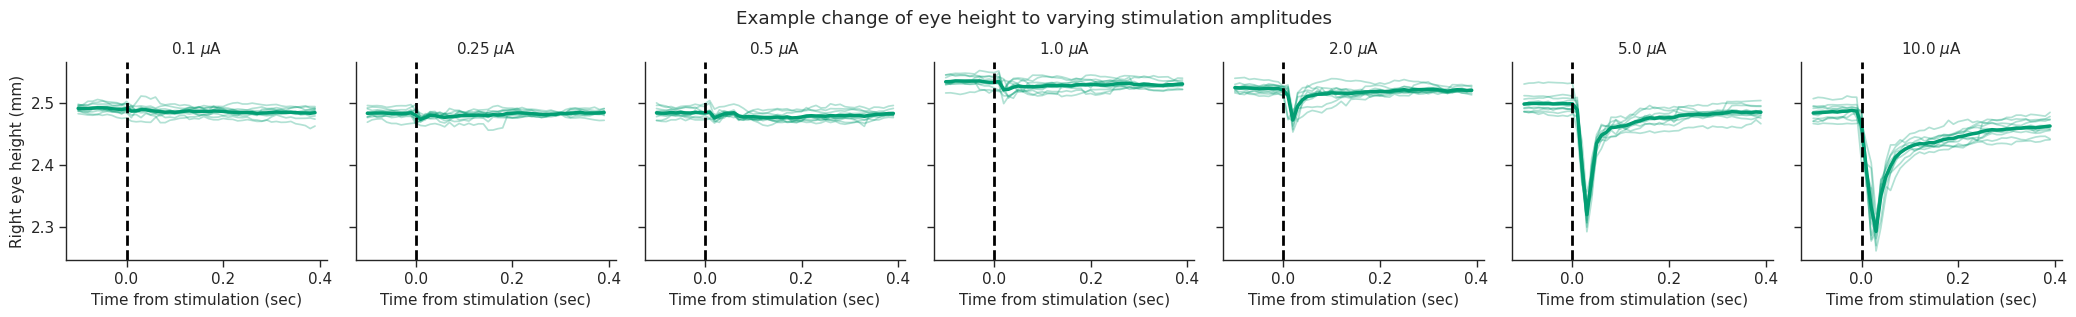

In [9]:
def plot_helper(stim_times, timeseries, color):
    stim_times = _time_to_frame(stim_times.values[0])
    timeseries = timeseries.values[0]
    t_prestim = int(0.1 * 100) # 0.1 seconds before stim
    t_poststim = int(0.4 * 100) # 0.4 seconds after stim
    ys = [timeseries[(t - t_prestim):(t + t_poststim)] for t in stim_times]
    xs = [(np.arange(len(y)) - t_prestim) / 100 for y in ys]
    for x, y in zip(xs, ys):
        sns.lineplot(x=x, y=y, color=CONTROL_CMAP[0], alpha=0.3, linewidth=1.25)
    sns.lineplot(x=np.concatenate(xs), y=np.concatenate(ys),
                color=CONTROL_CMAP[0], errorbar=None, linewidth=2.5)
    plt.axvline(0, color="black", linestyle="dashed", linewidth=2)

# amplitudes = [0.5, 2, 5, 10]
sub_df = merge_df.query("date == '20240916' & mouse == 'R28' & "
                        # "stim_amplitude in @amplitudes & "
                        "stim_shank == 'A' & stim_depth == 'A' & "
                        "measurement_name == 'eye-height-right'")
g = sns.FacetGrid(sub_df,
                  col="stim_amplitude",
                  col_order=sub_df["stim_amplitude"].unique().sort(),
                  sharey=True,
                  aspect=1,
                  margin_titles=True)
g.map(plot_helper, "stim_times", "timeseries")
g.figure.suptitle("Example change of eye height to varying stimulation amplitudes", y=1.05)
g.set_titles(col_template="{col_name} $\mu$A")
g.set_xlabels("Time from stimulation (sec)")
g.set_ylabels("Right eye height (mm)")
sns.despine(g.figure)

### Stimulation response amplitude vs. current

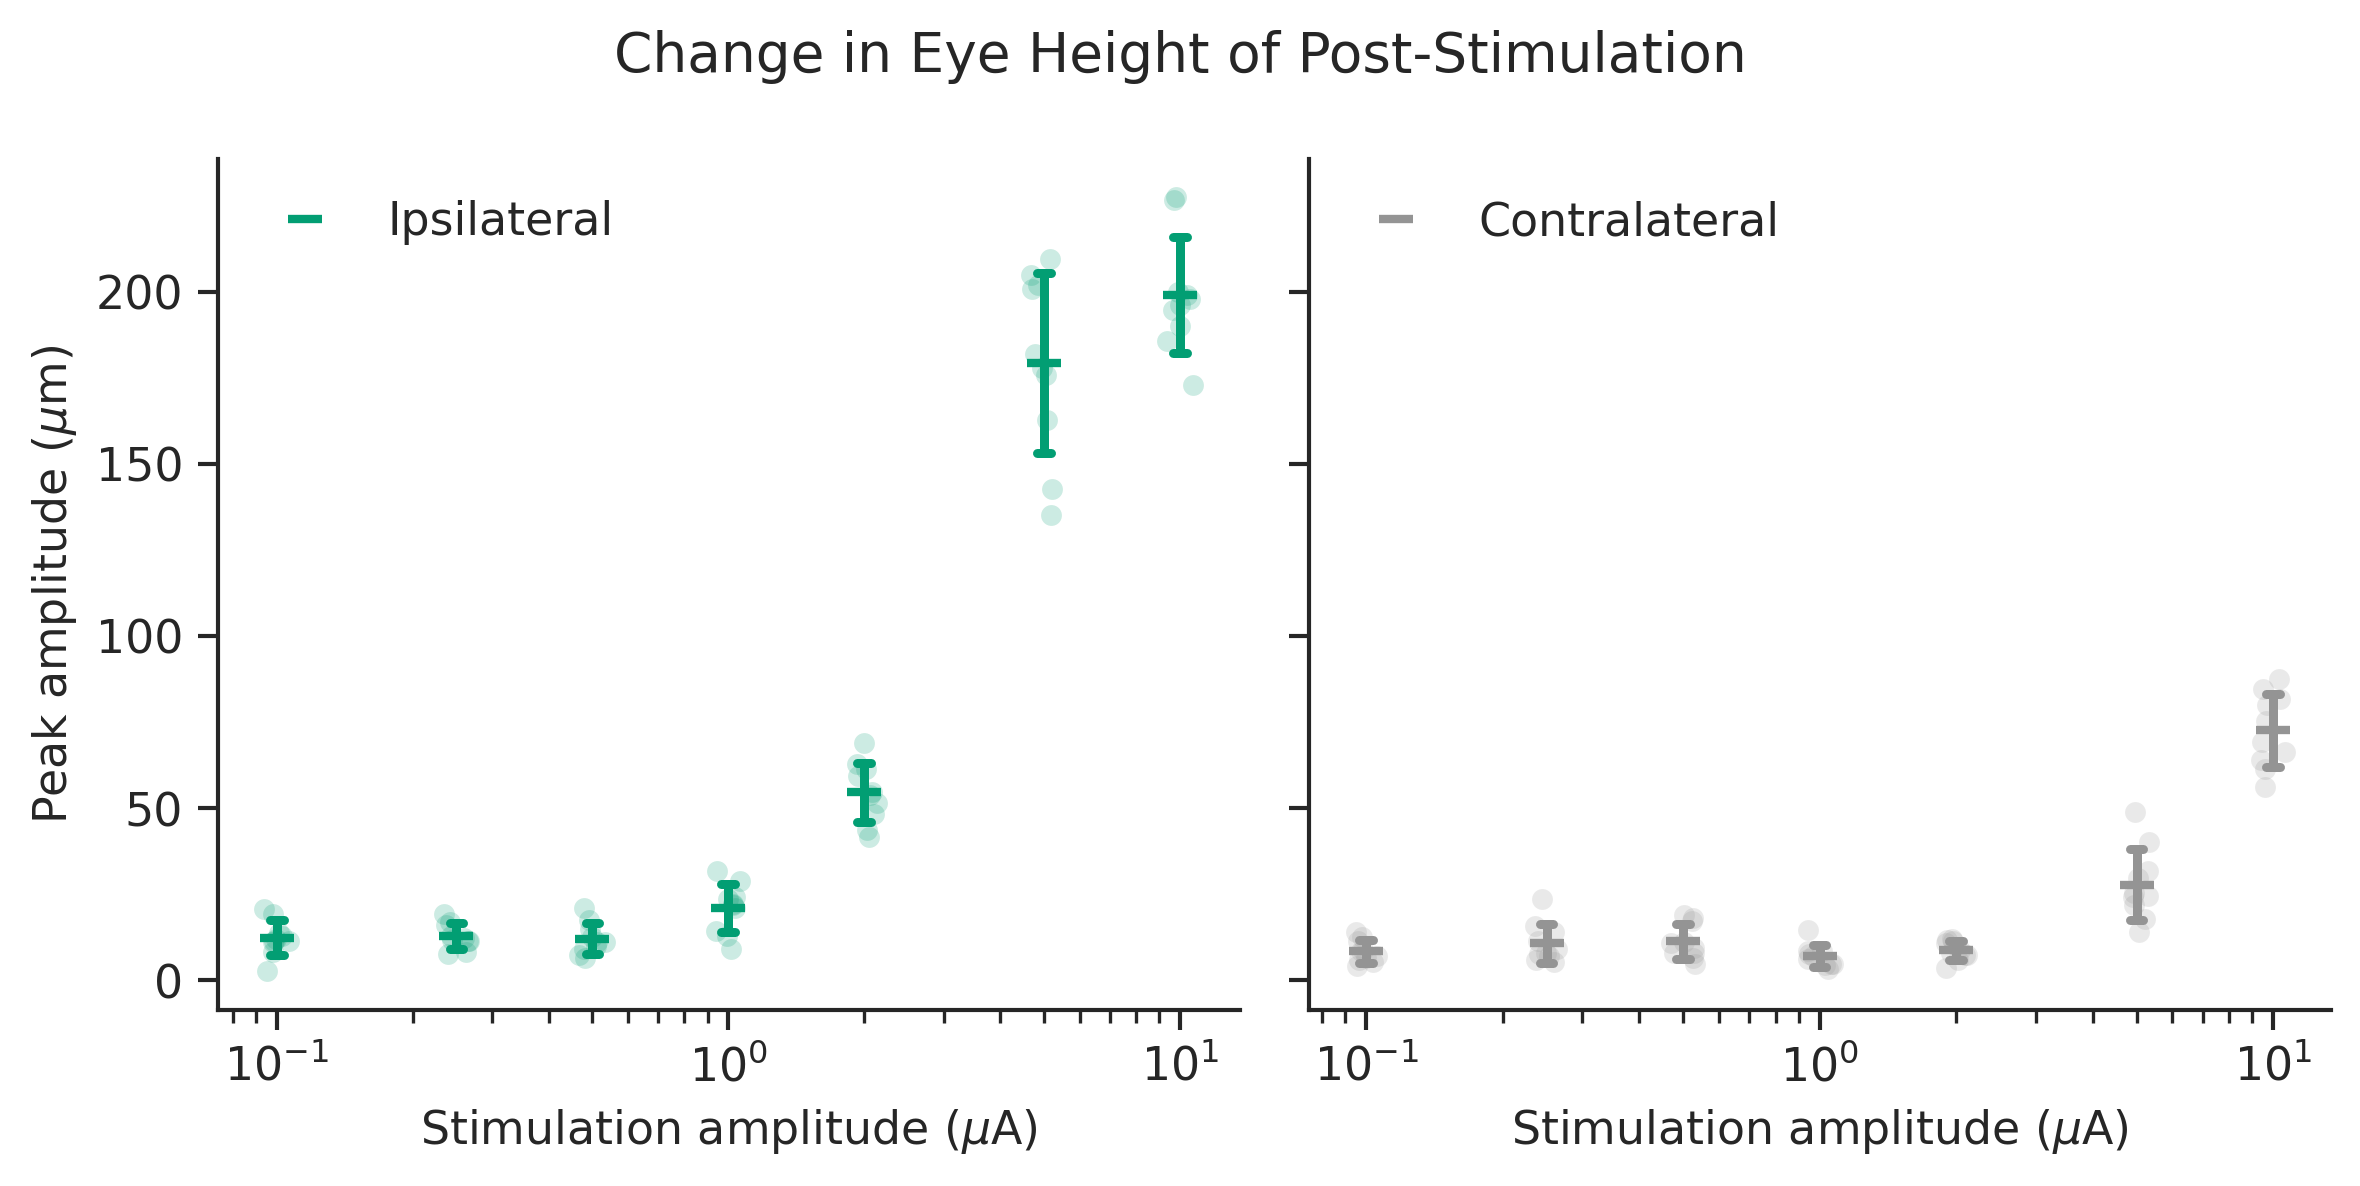

In [10]:
# sessions = list(set([(date, mouse) for date, mouse, _ in data_keys]))
sessions = [("20240916", "R28")]

for date, mouse in sessions:
    ipsi_side = CRANIOTOMY_MAP[mouse]
    contra_side = "right" if ipsi_side == "left" else "left"
    measure = f"eye-height-{ipsi_side}"
    ipsi_df = motion_df.query("date == @date & mouse == @mouse & "
                              "stim_shank == 'A' & stim_depth == 'A' & "
                              "measurement_name == @measure")
    measure = f"eye-height-{contra_side}"
    contra_df = motion_df.query("date == @date & mouse == @mouse & "
                                "stim_shank == 'A' & stim_depth == 'A' & "
                                "measurement_name == @measure")

    fig, ax = plt.subplots(ncols=2, dpi=300,
                           sharey=True, figsize=(8, 4))

    ipsi_xs = np.concatenate([np.repeat(amp, len(times))
                        for amp, times in zip(ipsi_df["stim_amplitude"].values,
                                            ipsi_df["peak_amplitude"].values)], axis=0)
    ipsi_ys = np.abs(np.concatenate(ipsi_df["peak_amplitude"].values, axis=0)) * 1000

    contra_xs = np.concatenate([np.repeat(amp, len(times))
                        for amp, times in zip(contra_df["stim_amplitude"].values,
                                            contra_df["peak_amplitude"].values)], axis=0)
    contra_ys = np.abs(np.concatenate(contra_df["peak_amplitude"].values, axis=0)) * 1000

    sns.stripplot(x=ipsi_xs, y=ipsi_ys,
                  alpha=0.2,
                  color=CONTROL_CMAP[0],
                  native_scale=True,
                  log_scale=(True, False),
                  #   label="Ipsilateral",
                  ax=ax[0])
    sns.pointplot(x=ipsi_xs, y=ipsi_ys,
                  color=CONTROL_CMAP[0],
                  linestyle="none",
                  marker="_", markersize=8, markeredgewidth=2,
                  label="Ipsilateral",
                  capsize=0.1,
                  native_scale=True,
                  log_scale=(True, False),
                  errorbar=(lambda x: (x.mean() - x.std(ddof=1), x.mean() + x.std(ddof=1))),
                  legend=False,
                  ax=ax[0])

    sns.stripplot(x=contra_xs, y=contra_ys,
                  alpha=0.2,
                  color=CONTROL_CMAP[1],
                  native_scale=True,
                  log_scale=(True, False),
                  #   label="Contralateral",
                  ax=ax[1])
    sns.pointplot(x=contra_xs, y=contra_ys,
                  color=CONTROL_CMAP[1],
                  linestyle="none",
                  marker="_", markersize=8, markeredgewidth=2,
                  label="Contralateral",
                  capsize=0.1,
                  native_scale=True,
                  log_scale=(True, False),
                  errorbar=(lambda x: (x.mean() - x.std(ddof=1), x.mean() + x.std(ddof=1))),
                  legend=False,
                  ax=ax[1])

    sns.despine(fig)
    ax[0].legend(frameon=False, loc="upper left")
    ax[1].legend(frameon=False, loc="upper left")
    ax[0].set_xlabel("Stimulation amplitude ($\mu$A)")
    ax[1].set_xlabel("Stimulation amplitude ($\mu$A)")
    ax[0].set_ylabel("Peak amplitude ($\mu$m)")
    fig.suptitle("Change in Eye Height of Post-Stimulation")
    fig.tight_layout()

### ROC AUC curves

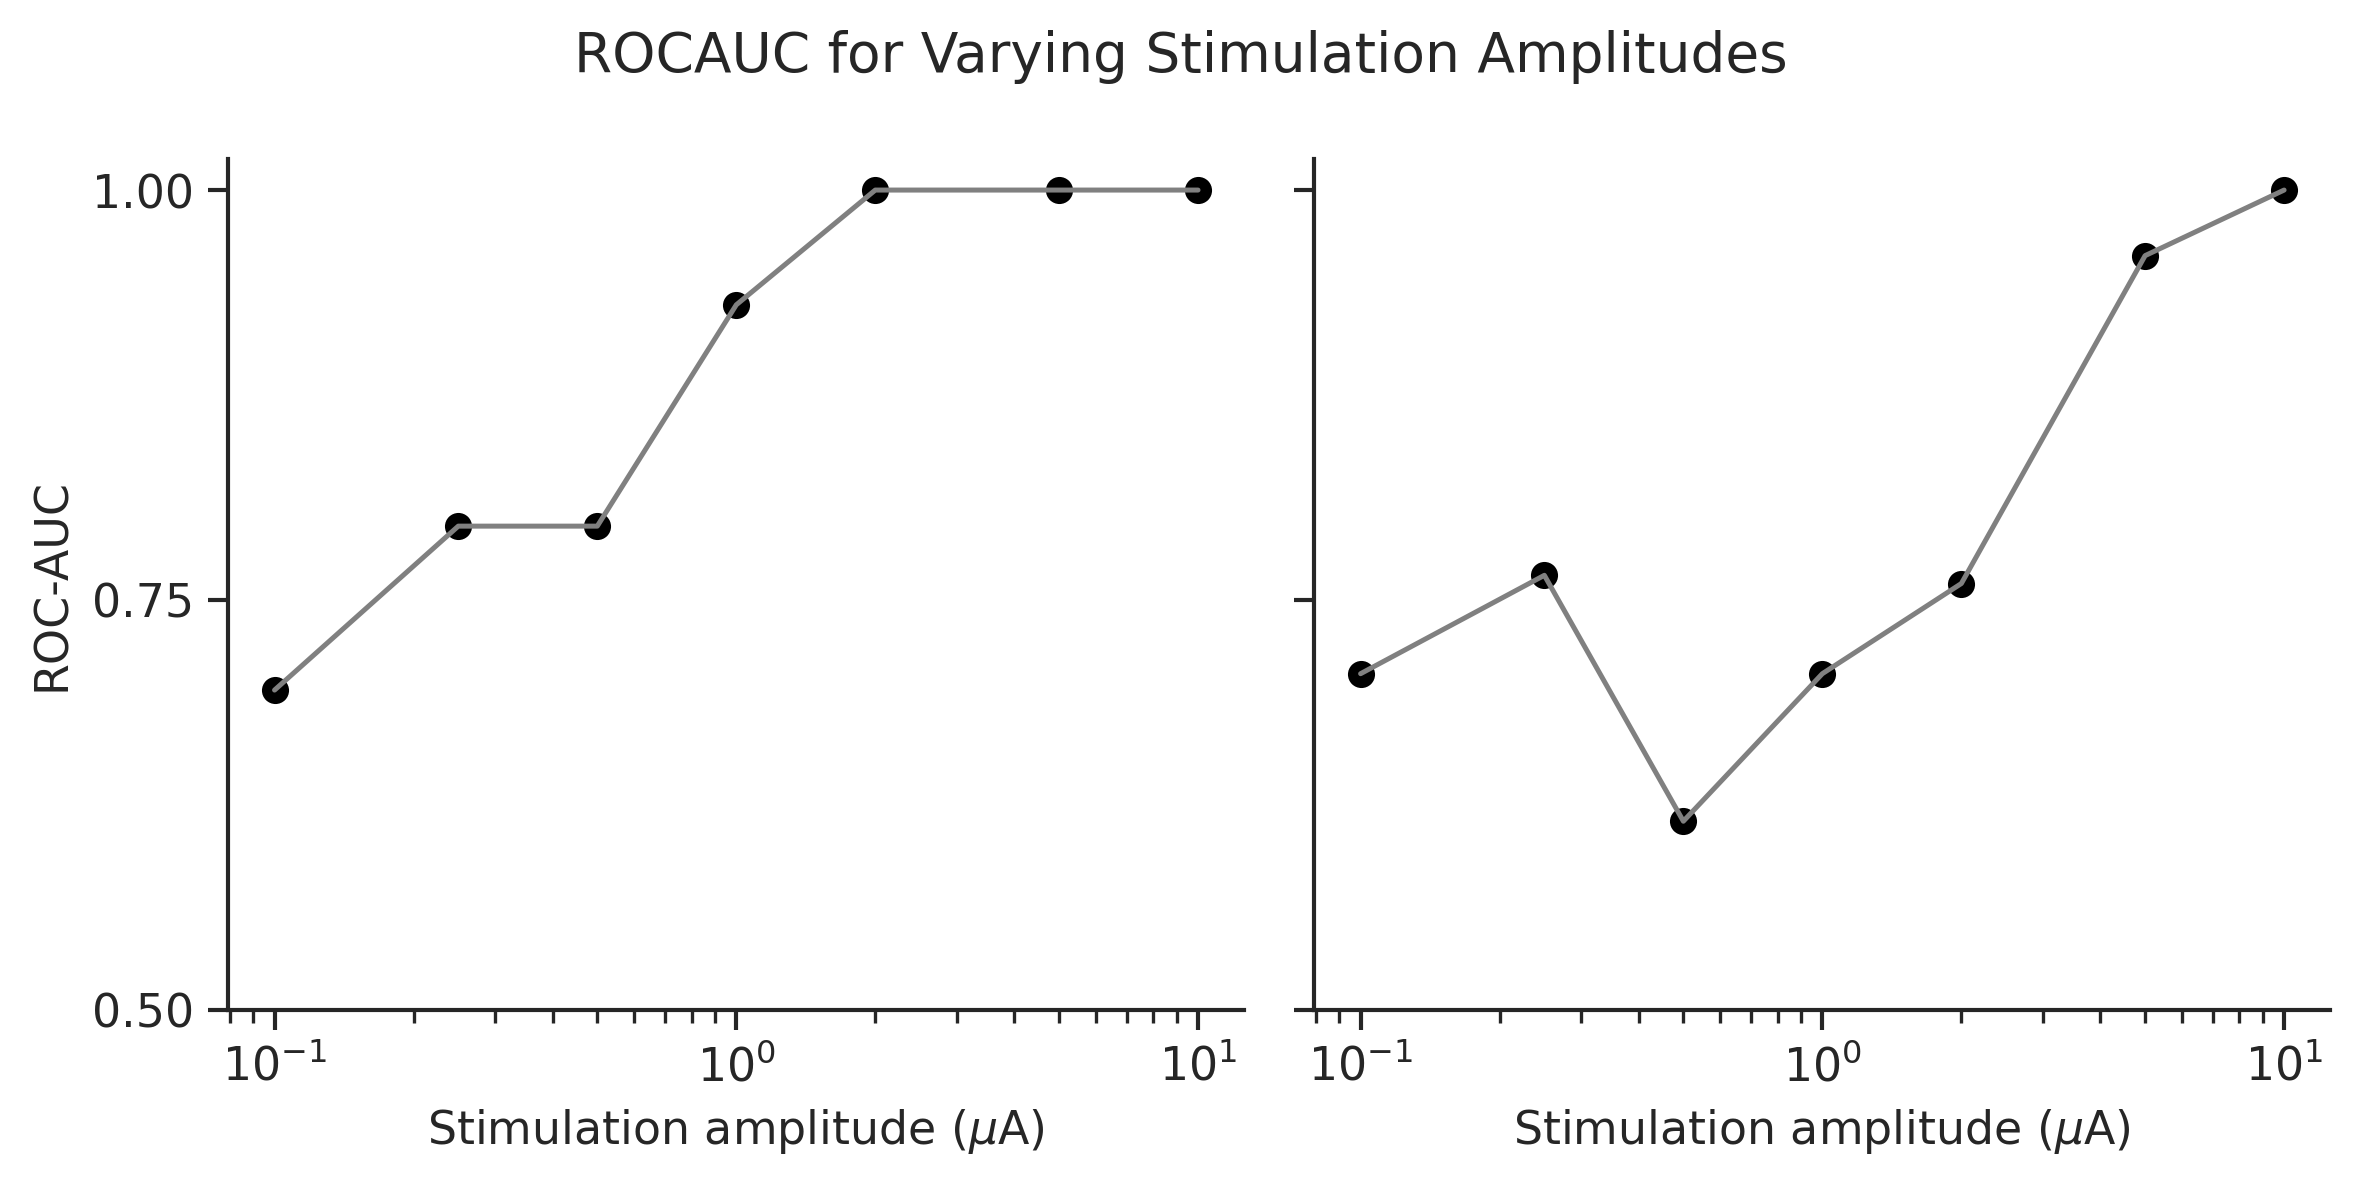

In [11]:
# sessions = list(set([(date, mouse) for date, mouse, _ in data_keys]))
sessions = [("20240916", "R28")]

locator = FixedLocator([0.5, 0.75, 1.0])

for date, mouse in sessions:
    ipsi_side = CRANIOTOMY_MAP[mouse]
    contra_side = "right" if ipsi_side == "left" else "left"
    measure = f"eye-height-{ipsi_side}"
    ipsi_df = motion_df.query("date == @date & mouse == @mouse & "
                              "stim_shank == 'A' & stim_depth == 'A' & "
                              "measurement_name == @measure")
    measure = f"eye-height-{contra_side}"
    contra_df = motion_df.query("date == @date & mouse == @mouse & "
                                "stim_shank == 'A' & stim_depth == 'A' & "
                                "measurement_name == @measure")
    amplitudes = motion_df.query("date == @date & mouse == @mouse & "
                                 "stim_shank == 'A' & stim_depth == 'A'").stim_amplitude.unique()
    amplitudes = np.sort(amplitudes)
    amp_colors = sns.light_palette("seagreen", len(amplitudes) + 1)

    fig, axs = plt.subplots(ncols=2,
                            dpi=300,
                            sharex=True,
                            sharey=True,
                            figsize=(8, 4))

    ipsi_auc = []
    contra_auc = []
    for i, amplitude in enumerate(amplitudes):
        pre_peak = np.concatenate(
            ipsi_df.query("stim_amplitude == @amplitude").fp_peak_amplitude.values,
            axis=0
        )
        post_peak = np.concatenate(
            ipsi_df.query("stim_amplitude == @amplitude").tp_peak_amplitude.values,
            axis=0
        )
        # see https://mmuratarat.github.io/2019-10-01/how-to-compute-AUC-plot-ROC-by-hand
        min_val = np.minimum(np.min(pre_peak), np.min(post_peak))
        max_val = np.maximum(np.max(pre_peak), np.max(post_peak))
        thresholds = np.linspace(min_val - np.abs(min_val - max_val) * 0.1,
                                 max_val + np.abs(min_val - max_val) * 0.1,
                                 100)
        fpr = np.array([np.mean(pre_peak < thresh) for thresh in thresholds])
        tpr = np.array([np.mean(post_peak < thresh) for thresh in thresholds])
        auc = np.trapz(tpr, fpr)
        ipsi_auc.append(auc)

        pre_peak = np.concatenate(
            contra_df.query("stim_amplitude == @amplitude").fp_peak_amplitude.values,
            axis=0
        )
        post_peak = np.concatenate(
            contra_df.query("stim_amplitude == @amplitude").tp_peak_amplitude.values,
            axis=0
        )
        min_val = np.minimum(np.min(pre_peak), np.min(post_peak))
        max_val = np.maximum(np.max(pre_peak), np.max(post_peak))
        thresholds = np.linspace(min_val - np.abs(min_val - max_val) * 0.1,
                                 max_val + np.abs(min_val - max_val) * 0.1,
                                 100)
        fpr = np.array([np.mean(pre_peak < thresh) for thresh in thresholds])
        tpr = np.array([np.mean(post_peak < thresh) for thresh in thresholds])
        auc = np.trapz(tpr, fpr)
        contra_auc.append(auc)
    sns.lineplot(x=amplitudes, y=ipsi_auc, color="gray", ax=axs[0])
    sns.scatterplot(x=amplitudes, y=ipsi_auc, s=50, c="black", ax=axs[0])
    sns.lineplot(x=amplitudes, y=contra_auc, color="gray", ax=axs[1])
    sns.scatterplot(x=amplitudes, y=contra_auc, s=50, c="black", ax=axs[1])
    axs[0].set_xlabel("Stimulation amplitude ($\mu$A)")
    axs[0].set_ylabel("ROC-AUC")
    axs[1].set_xlabel("Stimulation amplitude ($\mu$A)")
    axs[1].set_ylabel("ROC-AUC")
    axs[0].set_xscale("log")
    axs[1].set_xscale("log")
    axs[0].set_ylim(0.5, None)
    axs[1].set_ylim(0.5, None)
    axs[0].yaxis.set_major_locator(locator)
    axs[1].yaxis.set_major_locator(locator)
    fig.suptitle("ROCAUC for Varying Stimulation Amplitudes")
    sns.despine(fig)
    fig.tight_layout()

## Panel C

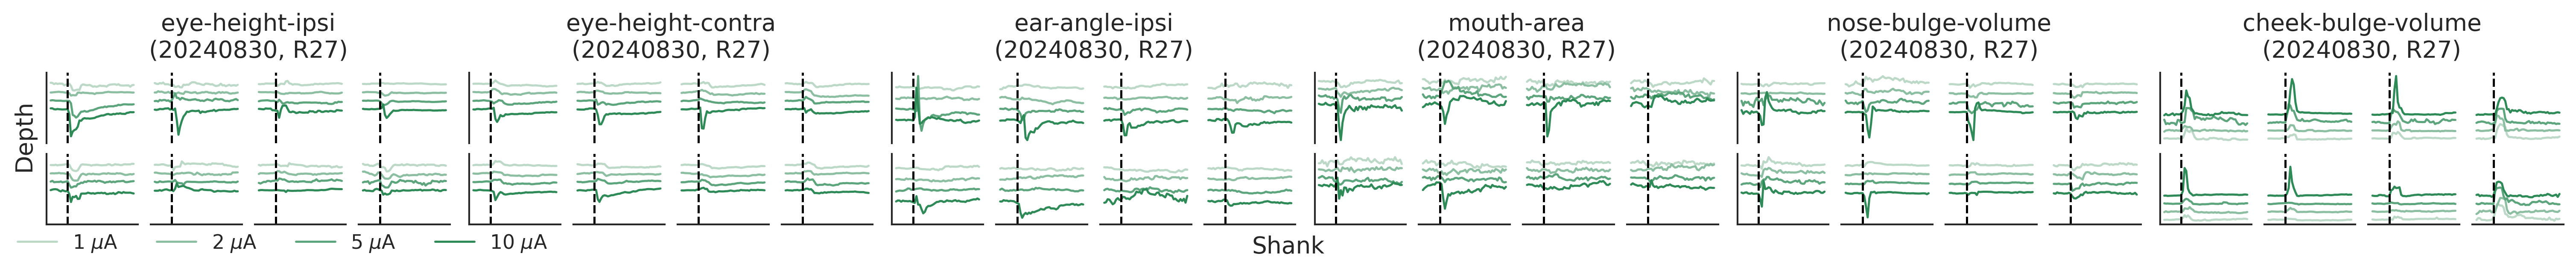

In [ ]:
def _time_to_frame(ts):
    return np.floor(ts * 100).astype(int)

measurements = ["eye-height-ipsi",
                "eye-height-contra",
                "ear-angle-ipsi",
                "ear-angle-contra",
                "mouth-area",
                "nose-bulge-volume",
                "cheek-bulge-volume"]

def plot_stim_align_helper(stim_times, timeseries, color, label, shift = 0):
    stim_times = _time_to_frame(stim_times.values[0])
    timeseries = timeseries.values[0]
    t_prestim = int(0.1 * 100) # 0.1 seconds before stim
    t_poststim = int(0.4 * 100) # 0.4 seconds after stim
    baselines = [np.mean(timeseries[(t - t_prestim):t]) for t in stim_times]
    ys = np.mean([timeseries[(t - t_prestim):(t + t_poststim)] - b + shift
                  for t, b in zip(stim_times, baselines)], axis=0)
    xs = (np.arange(len(ys)) - t_prestim) / 100
    sns.lineplot(x=xs, y=ys, color=color, label=label, legend=False)
    plt.axvline(0, color="black", linestyle="dashed")

amplitudes = [1, 2, 5, 10]
amp_colors = sns.light_palette("seagreen", len(amplitudes) + 1)
fig = plt.figure(dpi=300, figsize=(20, 2), layout="constrained")
subfigs = fig.subfigures(ncols=len(measurements) - 1)

amp_shift = {
    "eye-height-ipsi": -0.02,
    "eye-height-contra": -0.02,
    "ear-angle-ipsi": -0.7,
    "mouth-area": -0.05,
    "nose-bulge-volume": -0.2,
    "cheek-bulge-volume": 1
}

min_val = np.inf
max_val = -np.inf
for measure in ("eye-height-ipsi", "eye-height-contra"):
    ipsi_side = CRANIOTOMY_MAP["R27"]
    contra_side = "right" if ipsi_side == "left" else "left"
    _measure = measure.replace("ipsi", ipsi_side).replace("contra", contra_side)
    row = motion_df.query("date == '20240830' & mouse == 'R27' & "
                          "measurement_name == @_measure & "
                          "stim_amplitude in @amplitudes & "
                          "stim_shank != 'A' & stim_depth != 'A'")
    vals = [np.mean(x) for x in row.peak_amplitude.values]
    min_val = min(min_val, min(vals, default=np.inf))
    max_val = max(max_val, max(vals, default=-np.inf))
min_val = (None if np.isinf(min_val)
                else min_val + amp_shift["eye-height-ipsi"] * (len(amplitudes) - 1))
max_val = None if np.isinf(max_val) else max_val

for i, measure in enumerate(filter(lambda x: x != "ear-angle-contra", measurements)):
    f = subfigs[i]
    ipsi_side = CRANIOTOMY_MAP["R27"]
    contra_side = "right" if ipsi_side == "left" else "left"
    _measure = measure.replace("ipsi", ipsi_side).replace("contra", contra_side)
    axs = f.subplots(nrows=2, ncols=4, sharex=True, sharey=True)
    for p, depth in enumerate(("U", "L")):
        for q, shank in enumerate(("1", "2", "3", "4")):
            plt.sca(axs[p, q])
            for k, amp in enumerate(amplitudes):
                row = merge_df.query("date == '20240830' & mouse == 'R27' & "
                                     "stim_shank == @shank & stim_depth == @depth & "
                                     "stim_amplitude == @amp & "
                                     "measurement_name == @_measure")
                if len(row) == 0:
                    continue
                if (i == 0) and (p == 0) and (q == 0):
                    label = f"{amp} $\mu$A"
                else:
                    label = None
                plot_stim_align_helper(row.stim_times,
                                       row.timeseries,
                                       amp_colors[k + 1],
                                       label, shift=(amp_shift[measure] * k))
            sns.despine(ax=axs[p, q], left=(q > 0), bottom=(p == 0))
            if p == 0:
                axs[p, q].set_xticks([])
            if q > 0:
                axs[p, q].set_yticks([])
            if "eye" in measure:
                axs[p, q].set_ylim(min_val, max_val)
    f.suptitle(f"{measure}\n(20240830, R27)")
fig.supxlabel("Shank")
fig.supylabel("Depth")
fig.legend(ncols=len(amplitudes), loc="lower left", frameon=False)

## Panel D

In [13]:
locations = np.array([[[i, j] for j in range(4)] for i in range(2)])
locations = locations + np.array([[[0.5, 0.5]]])
measurements = ["eye-height-ipsi",
                "eye-height-contra",
                "ear-angle-ipsi",
                "ear-angle-contra",
                "mouth-area",
                "nose-bulge-volume",
                "cheek-bulge-volume"]
sessions = list(set([(date, mouse) for date, mouse, _ in data_keys]))
amplitudes = motion_df.query("stim_shank != 'A' & stim_depth != 'A'").stim_amplitude.unique()
data = {amp: {session: {measure: np.full((2, 4), np.nan) for measure in measurements}
              for session in sessions}
        for amp in amplitudes}
for amp in amplitudes:
    for session in sessions:
        date, mouse = session
        for measure in measurements:
            for row, depth in enumerate(("U", "L")):
                for col, shank in enumerate(("1", "2", "3", "4")):
                    ipsi_side = CRANIOTOMY_MAP[mouse]
                    contra_side = "right" if ipsi_side == "left" else "left"
                    _measure = (measure.replace("ipsi", ipsi_side)
                                       .replace("contra", contra_side))
                    response = motion_df.query(
                        "date == @date & mouse == @mouse & "
                        "measurement_name == @_measure & "
                        "stim_amplitude == @amp & "
                        "stim_shank == @shank & stim_depth == @depth"
                    )
                    if len(response) == 0:
                        continue
                    peak = np.concatenate(response.peak_amplitude.values, axis=0)
                    data[amp][session][measure][row, col] = np.mean(peak)

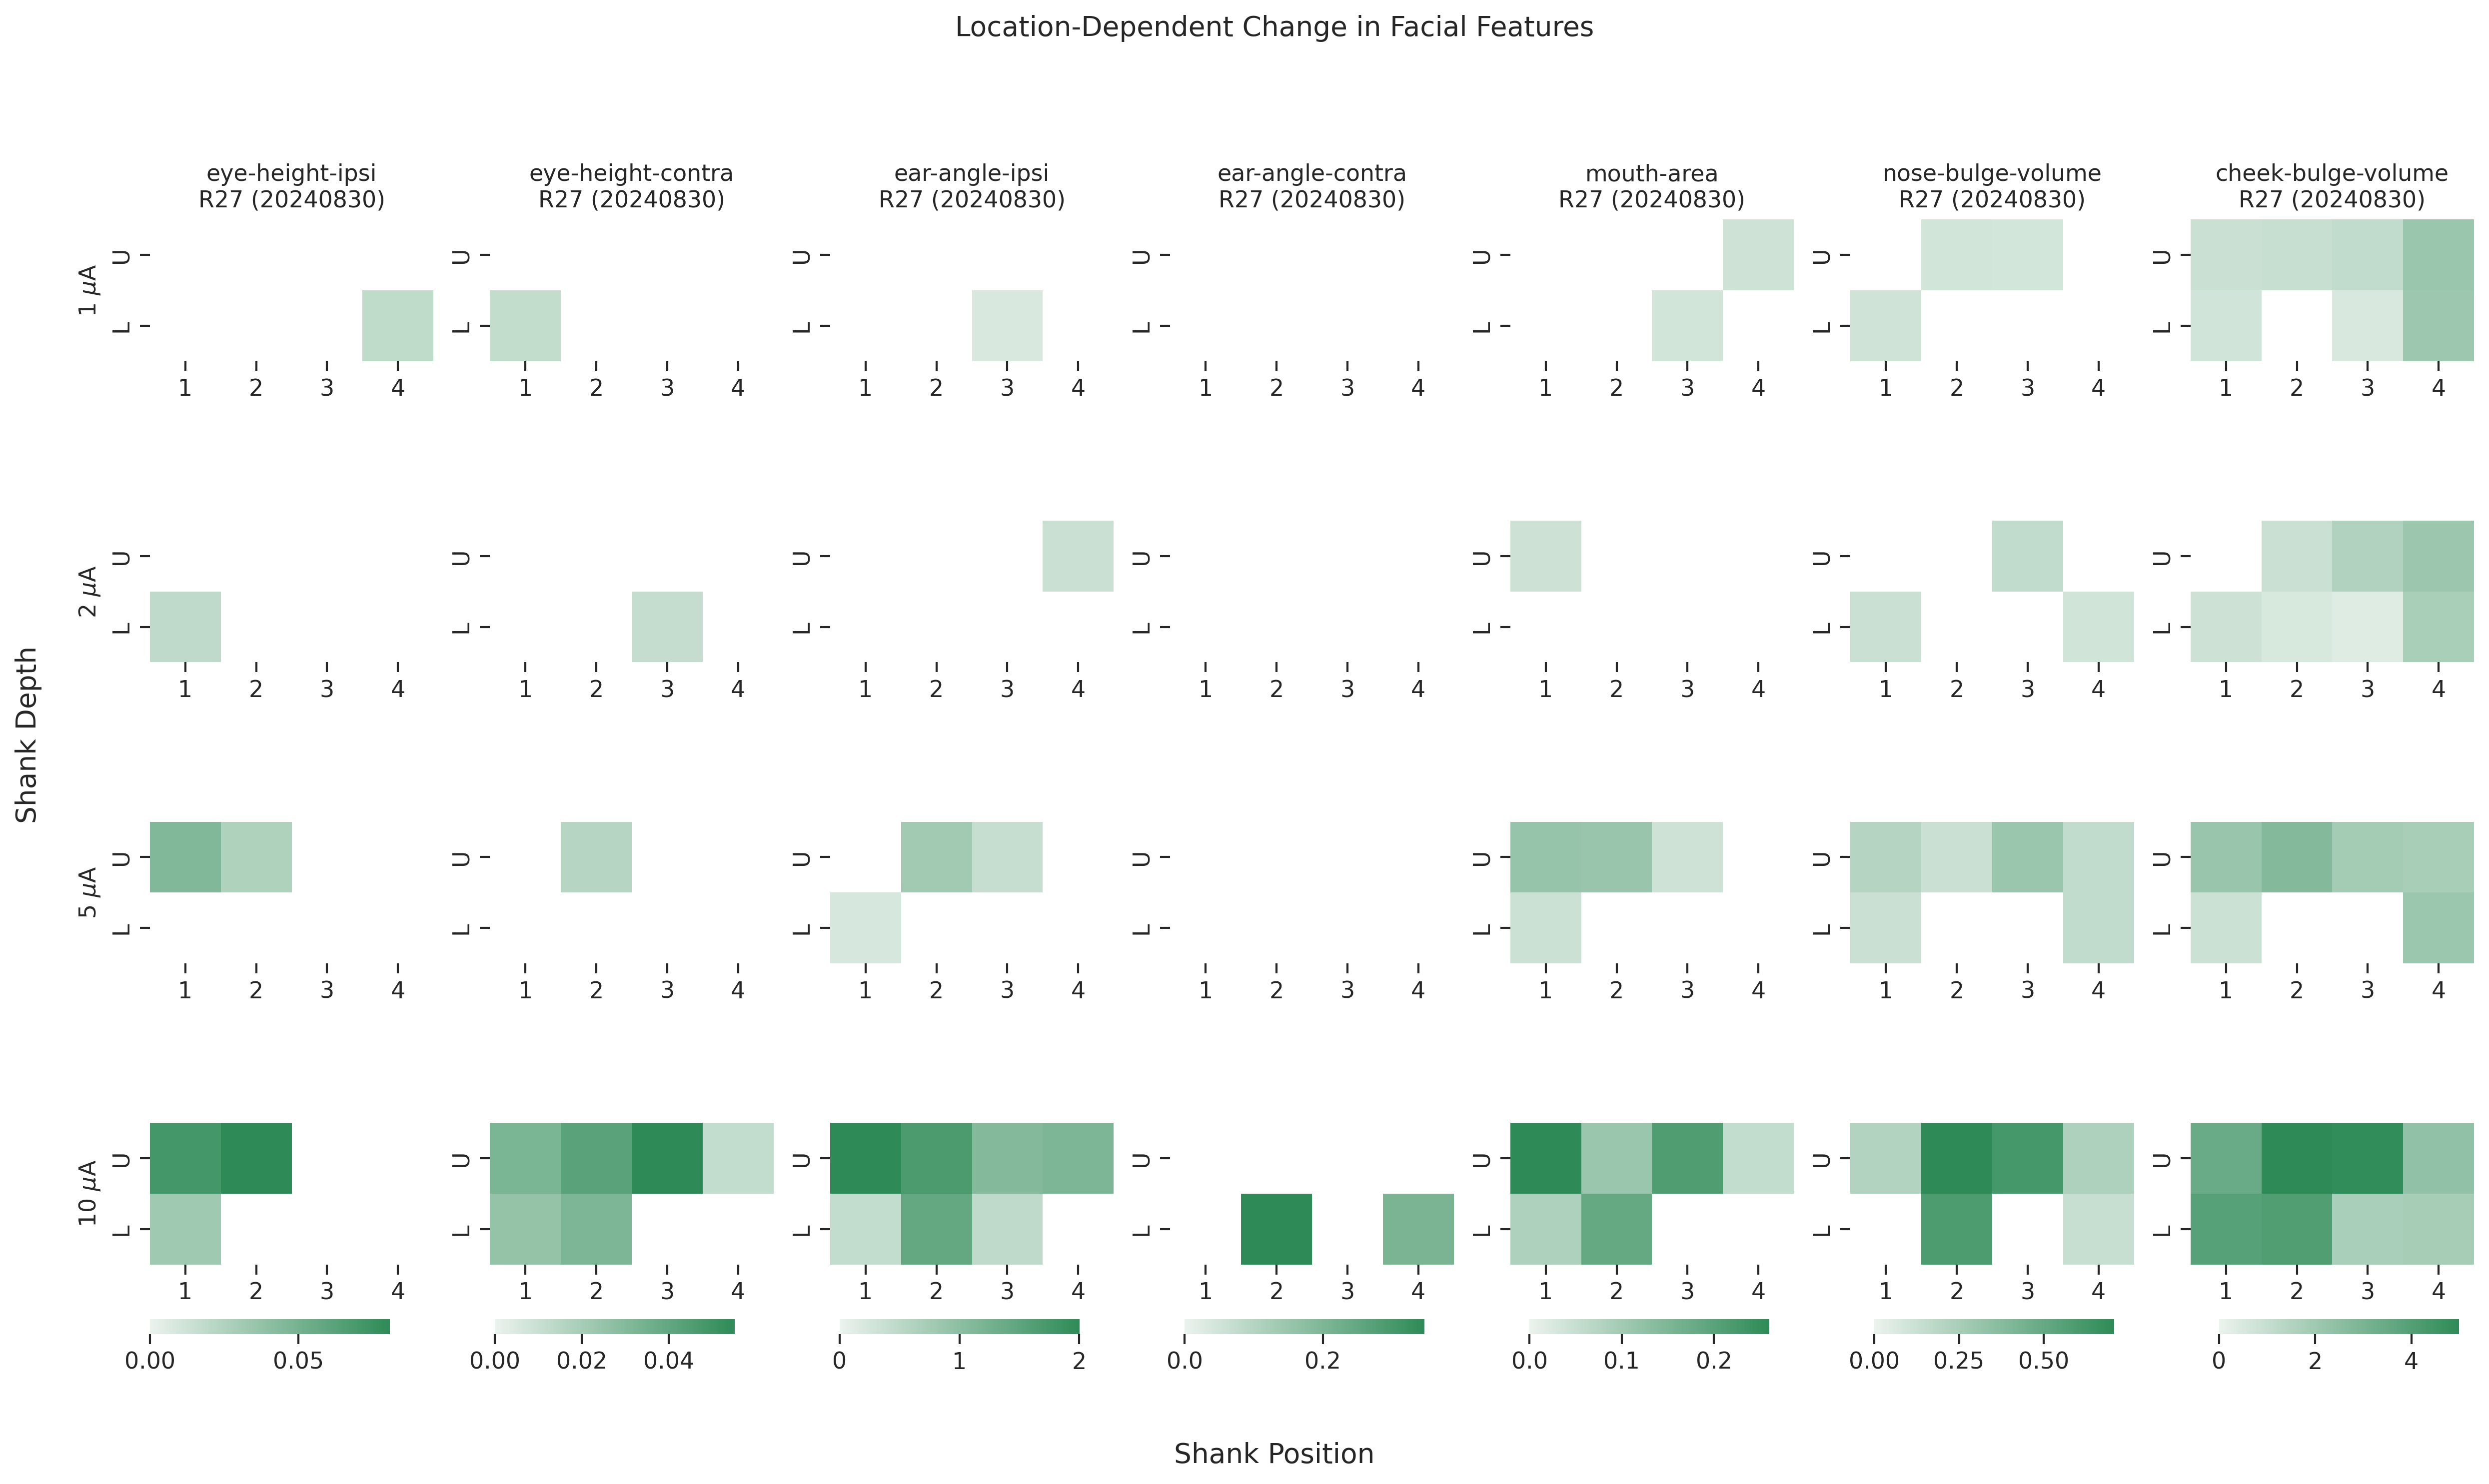

In [14]:
amplitudes = [1, 2, 5, 10]
measure_to_session = defaultdict(lambda: ("20240830", "R27"))

fig, axs = plt.subplots(dpi=300, figsize=(20, 10),
                        nrows=len(amplitudes), ncols=len(measurements))

cbar_axs = []
for i in range(len(measurements)):
    cbar_axs.append(fig.add_axes([0.125 + i * 0.115, 0.1, 0.08, 0.01]))
for j, measure in enumerate(measurements):
    session = measure_to_session[measure]
    date, mouse = session
    ipsi_side = CRANIOTOMY_MAP[mouse]
    contra_side = "left" if ipsi_side == "right" else "right"
    thresh = JITTER_THRESH[measure.replace("ipsi", ipsi_side)
                                  .replace("contra", contra_side)] / 100 * 4
    data_min = min(np.min(np.abs(data[amp][session][measure]),
                          where=~np.isnan(data[amp][session][measure]),
                          initial=0)
                   for amp in amplitudes)
    data_max = max(np.max(np.abs(data[amp][session][measure]),
                          where=~np.isnan(data[amp][session][measure]),
                          initial=0)
                   for amp in amplitudes)
    for i, amp in enumerate(np.sort(amplitudes)):
        mask = (np.isnan(data[amp][session][measure]) |
                (np.abs(data[amp][session][measure]) <= thresh))
        sns.heatmap(data=np.abs(data[amp][session][measure]),
                    xticklabels=("1", "2", "3", "4"),
                    yticklabels=("U", "L"),
                    cbar_ax=cbar_axs[j],
                    cbar_kws={"orientation": "horizontal"},
                    square=True,
                    cmap=sns.light_palette("seagreen", as_cmap=True),
                    vmin=0,
                    vmax=data_max,
                    mask=mask,
                    ax=axs[i, j])
        if i == 0:
            axs[i, j].set_title(f"{measure}\n{mouse} ({date})")
        axs[i, 0].set_ylabel(f"{amp} $\mu$A")
    fig.supxlabel("Shank Position")
    fig.supylabel("Shank Depth", x=0.08)
    measure_title = (measure.replace("-", " ")
                            .capitalize()
                            .replace("ipsi", "\n(ipsilateral)")
                            .replace("contra", "\n(contralateral)"))
    fig.suptitle(f"Location-Dependent Change in Facial Features")

## Panel E

Text(0.5, 0.01, 'Whisker Pad Volume ($mm^3$)')

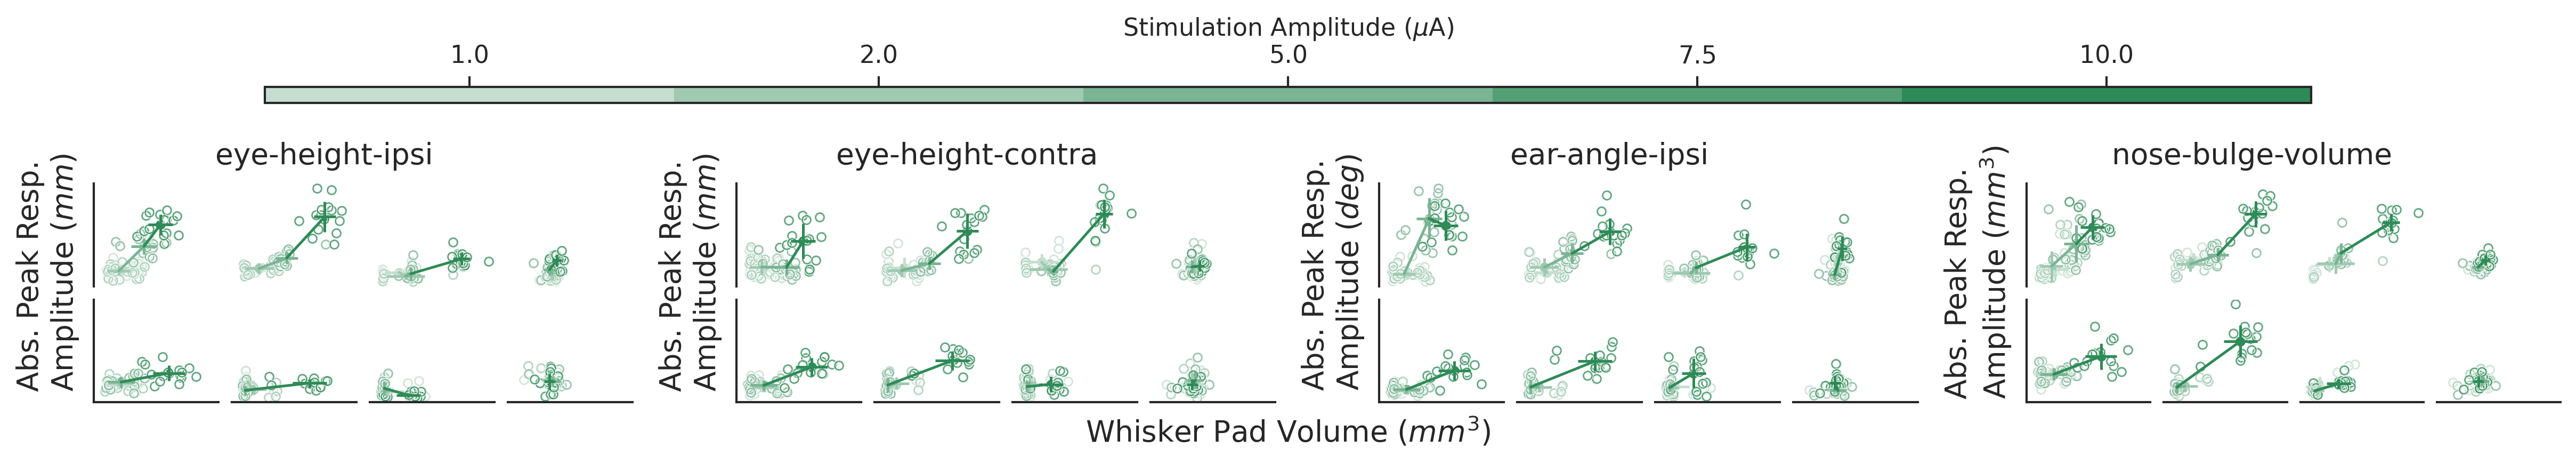

In [15]:
measures = ["eye-height-ipsi",
            "eye-height-contra",
            "ear-angle-ipsi",
            "nose-bulge-volume"]
sessions = [("20240830", "R27")]
amplitudes = np.sort(motion_df.query("stim_amplitude >= 1.0").stim_amplitude.unique())

ampl_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "pca cmap",
    sns.light_palette("seagreen", len(amplitudes) + 1)[1:],
    len(amplitudes)
)
colors = {ampl: ampl_cmap(i / len(amplitudes))
          for i, ampl in enumerate(amplitudes)}

fig = plt.figure(dpi=300, figsize=(16, 2), layout="constrained")
subfigs = fig.subfigures(ncols=len(measures))
cbar_ax = fig.add_axes([0.1, 1.1, 0.8, 0.05])

for i, measure in enumerate(measures):
    f = subfigs[i]
    axs = f.subplots(nrows=2, ncols=4, sharex=True, sharey=True)
    for p, depth in enumerate(("U", "L")):
        for q, shank in enumerate(("1", "2", "3", "4")):
            for date, mouse in sessions:
                ipsi_side = CRANIOTOMY_MAP[mouse]
                contra_side = "left" if ipsi_side == "right" else "right"
                _measure = measure.replace("ipsi", ipsi_side).replace("contra", contra_side)
                prev_features = None
                for amp in amplitudes:
                    trials = motion_df.query("date == @date & mouse == @mouse & "
                                             "stim_amplitude == @amp & "
                                             "stim_shank == @shank & stim_depth == @depth & "
                                             "measurement_name in [@_measure, 'cheek-bulge-volume']")
                    if len(trials) == 0:
                        continue
                    xs = np.abs(np.concatenate(
                        trials[trials.measurement_name == "cheek-bulge-volume"].peak_amplitude.values,
                        axis=0
                    ))
                    ys = np.abs(np.concatenate(
                        trials[trials.measurement_name == _measure].peak_amplitude.values,
                        axis=0
                    ))
                    if prev_features is not None:
                        axs[p, q].plot([np.mean(prev_features[0]), np.mean(xs)],
                                       [np.mean(prev_features[1]), np.mean(ys)],
                                       color=colors[amp], alpha=1)
                    prev_features = (np.copy(xs), np.copy(ys))
                    sns.scatterplot(x=[np.mean(xs)], y=[np.mean(ys)],
                                    color=colors[amp], ax=axs[p, q])
                    axs[p, q].errorbar([np.mean(xs)], [np.mean(ys)],
                                    xerr=[np.std(xs)],
                                    yerr=[np.std(ys)],
                                    ecolor=colors[amp])
                    sns.scatterplot(x=xs, y=ys,
                                    color=colors[amp],
                                    alpha=0.8,
                                    marker="$\circ$",
                                    ax=axs[p, q])
            sns.despine(ax=axs[p, q], left=(q > 0), bottom=(p == 0))
            if p == 0:
                axs[p, q].set_xticks([])
            if q > 0:
                axs[p, q].set_yticks([])
    units = motion_df.query("measurement_name == @_measure").measurement_units.unique()[0]
    f.suptitle(measure)
    f.supylabel(f"Abs. Peak Resp.\nAmplitude (${units}$)")
plt.colorbar(mpl.cm.ScalarMappable(cmap=ampl_cmap, norm=mpl.colors.NoNorm()),
             format=mpl.ticker.FuncFormatter(
                 lambda _, p: str(amplitudes[p]) if p < len(amplitudes) else None
             ),
             label="Stimulation Amplitude ($\mu$A)",
             location="top",
             orientation="horizontal",
             shrink=0.8,
             cax=cbar_ax)
fig.supxlabel("Whisker Pad Volume ($mm^3$)")

## Panel F

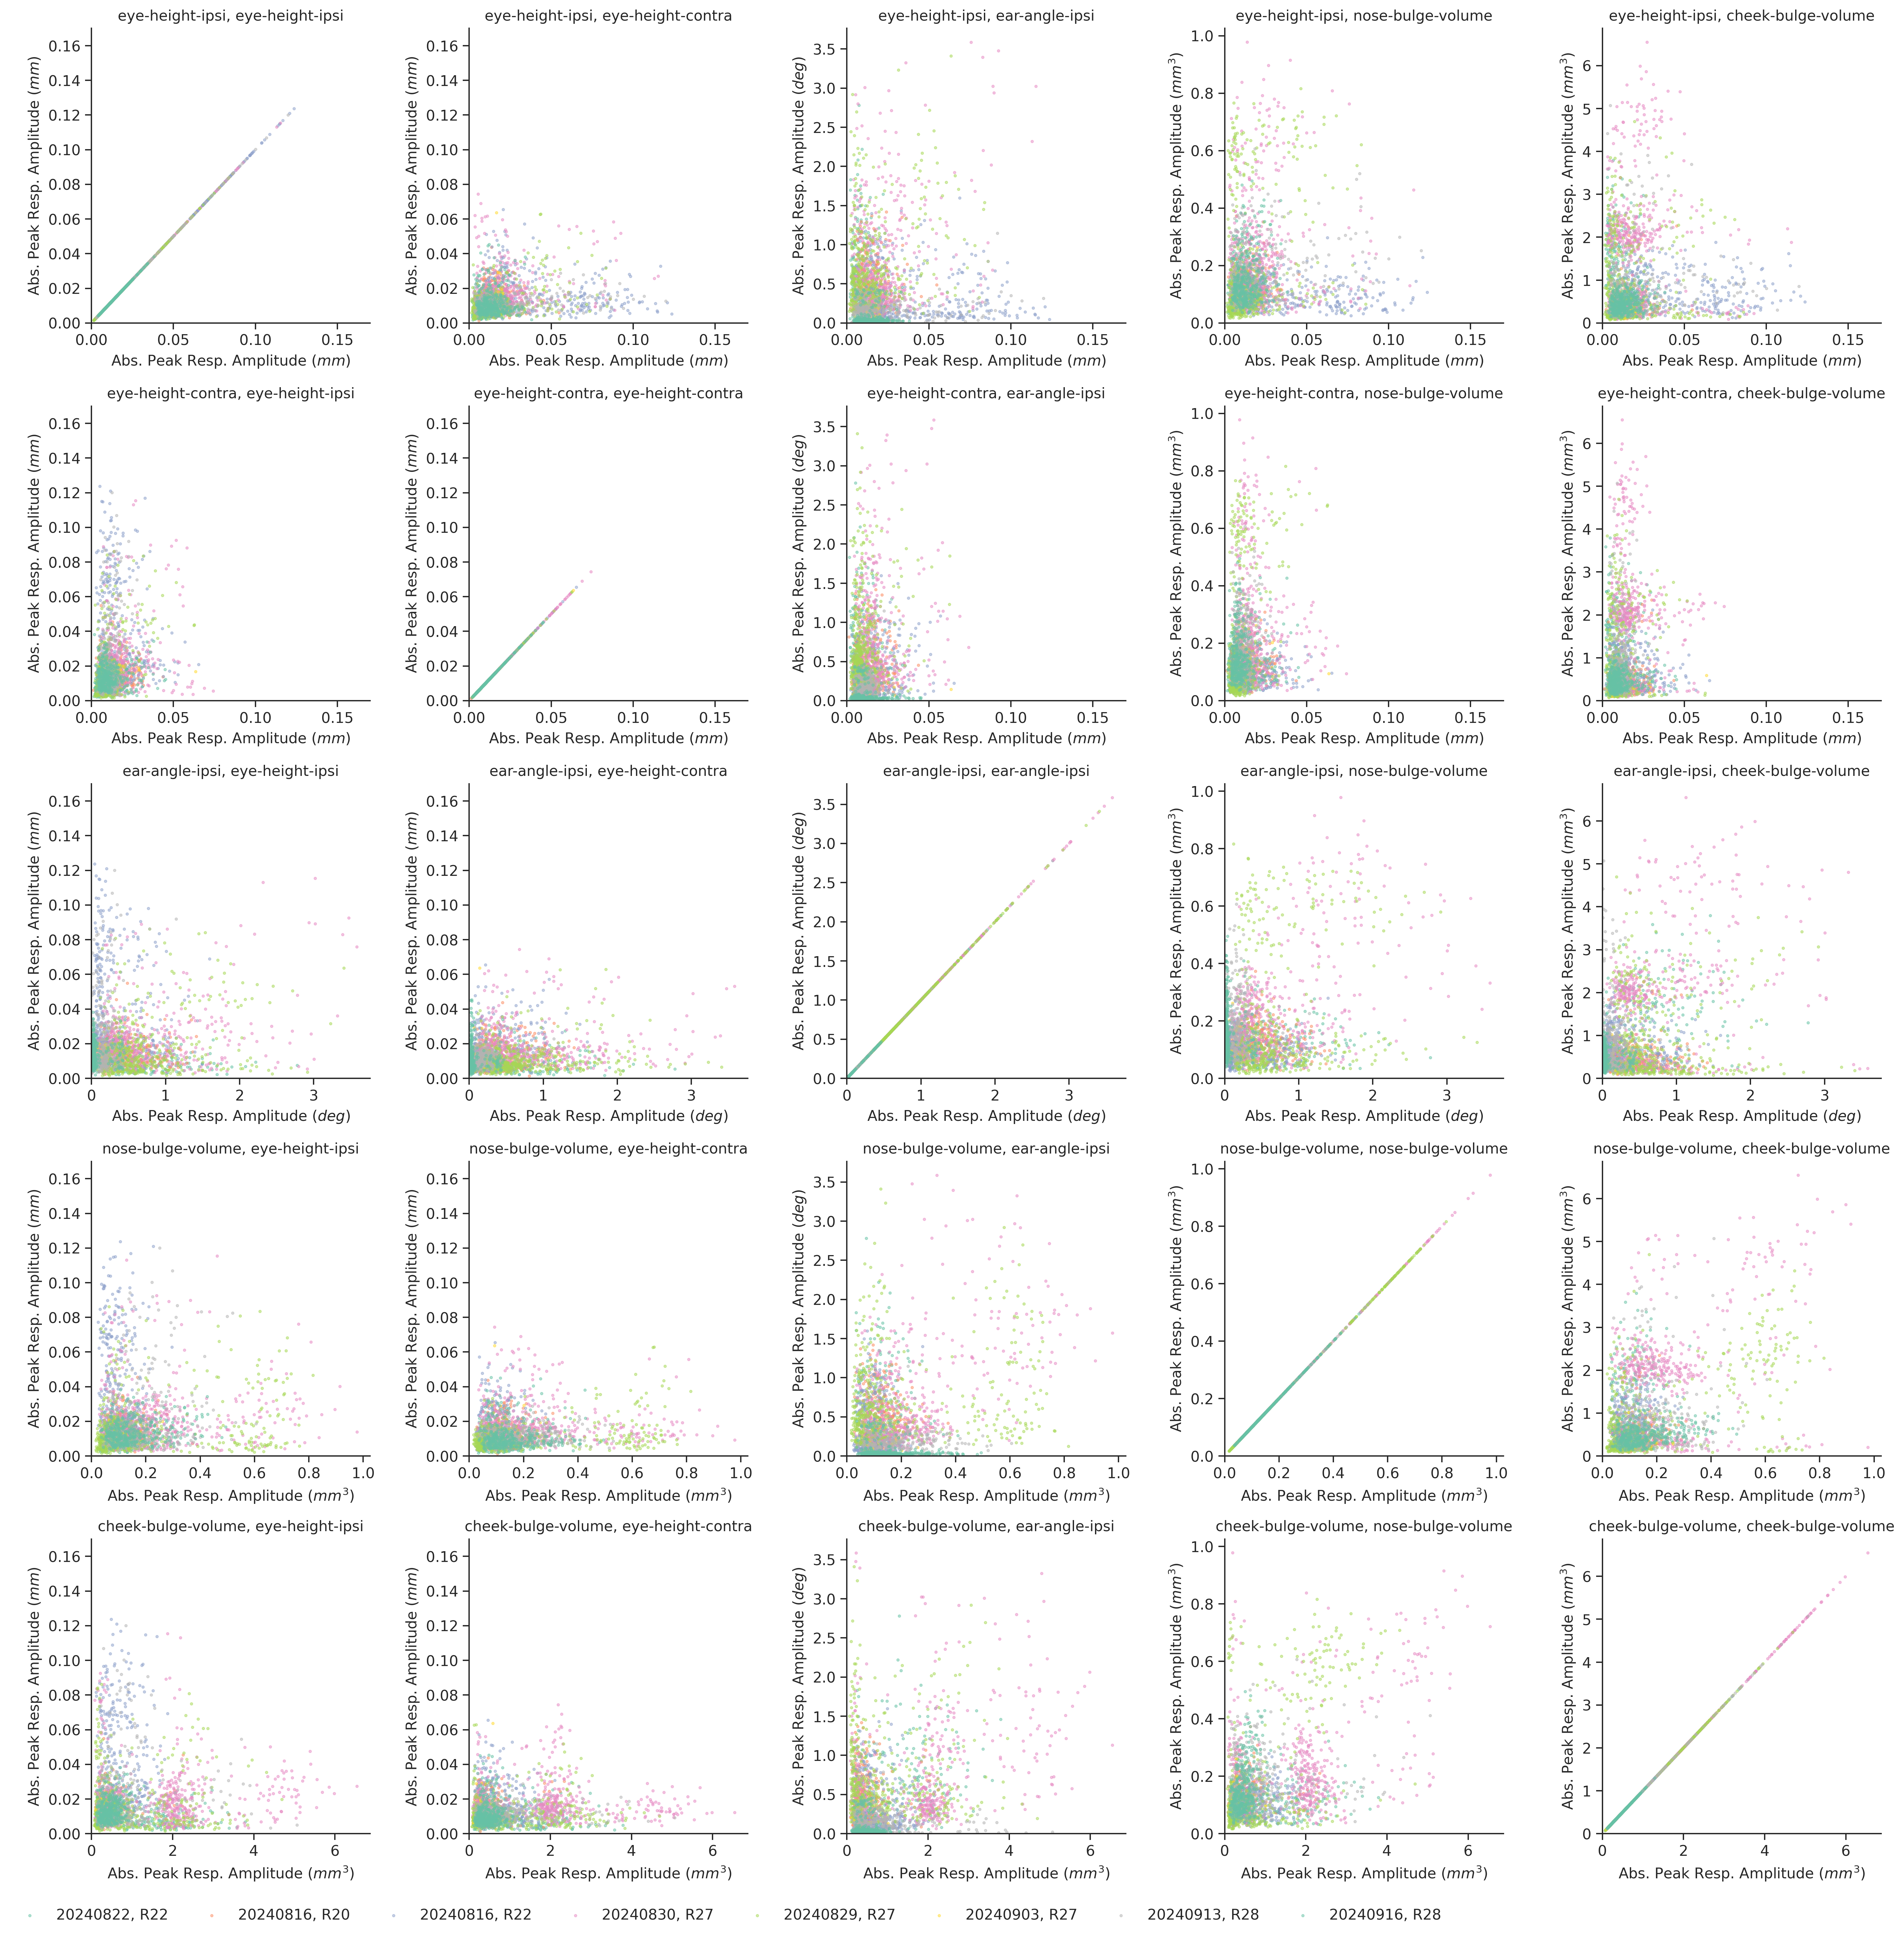

In [16]:
measures = ["eye-height-ipsi",
            "eye-height-contra",
            "ear-angle-ipsi",
            "nose-bulge-volume",
            "cheek-bulge-volume"]
sessions = list(set([(date, mouse) for date, mouse, _ in data_keys]))
amplitudes = np.sort(motion_df.query("stim_amplitude >= 1.0").stim_amplitude.unique())

session_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "pca cmap",
    sns.color_palette(n_colors=len(sessions)),
    len(sessions)
)
colors = {s: session_cmap(i / len(sessions)) for i, s in enumerate(sessions)}

fig, axs = plt.subplots(nrows=len(measures), ncols=len(measures),
                        dpi=300, figsize=(20, 20))

EAR_OUTLIERS = {
    ("20240816", "R22", "2U"),
    ("20240816", "R22", "3U"),
    ("20240822", "R22", "2U"),
    ("20240822", "R22", "3L"),
    ("20240822", "R22", "3U"),
    ("20240822", "R22", "4L"),
    ("20240822", "R22", "4U"),
    ("20240903", "R27", "1L"),
    ("20240903", "R27", "1U"),
    ("20240903", "R27", "2L"),
    ("20240903", "R27", "2U"),
    ("20240903", "R27", "3L"),
    ("20240903", "R27", "3U"),
    ("20240903", "R27", "4L"),
    ("20240903", "R27", "4U"),
    ("20240913", "R28", "4U"),
    ("20240917", "R28", "2L"),
    ("20240917", "R28", "4L")
}

CHEEK_OUTLIERS = {
    ("20240913", "R28", "1U"),
    ("20240917", "R28", "1L"),
    ("20240917", "R28", "1U"),
    ("20240917", "R28", "2L"),
    ("20240917", "R28", "2U"),
    ("20240917", "R28", "3L"),
    ("20240917", "R28", "3U"),
    ("20240917", "R28", "4L"),
    ("20240917", "R28", "4U")
}

sub_df = motion_df
for date, mouse, loc in EAR_OUTLIERS:
    shank, depth = loc
    sub_df = sub_df.query("date != @date | mouse != @mouse | stim_shank != @shank | stim_depth != @depth")
for date, mouse, loc in CHEEK_OUTLIERS:
    shank, depth = loc
    sub_df = sub_df.query("date != @date | mouse != @mouse | stim_shank != @shank | stim_depth != @depth")

for i, measure_i in enumerate(measures):
    for j, measure_j in enumerate(measures):
        for date, mouse in sessions:
            ipsi_side = CRANIOTOMY_MAP[mouse]
            contra_side = "left" if ipsi_side == "right" else "right"
            _measure_i = measure_i.replace("ipsi", ipsi_side).replace("contra", contra_side)
            _measure_j = measure_j.replace("ipsi", ipsi_side).replace("contra", contra_side)
            trials = sub_df.query("date == @date & mouse == @mouse & "
                                     "stim_amplitude in @amplitudes & "
                                     "stim_shank != 'A' & stim_depth != 'A' & "
                                     "measurement_name in [@_measure_i, @_measure_j]")
            if len(trials) == 0:
                continue
            xs = np.abs(np.concatenate(
                trials[trials.measurement_name == _measure_i].peak_amplitude.values,
                axis=0
            ))
            ys = np.abs(np.concatenate(
                trials[trials.measurement_name == _measure_j].peak_amplitude.values,
                axis=0
            ))
            if (i == 0) and (j == 0):
                label = f"{date}, {mouse}"
            else:
                label = None
            sns.scatterplot(x=xs, y=ys,
                            alpha=0.6,
                            s=2,
                            linewidth=1,
                            edgecolor=colors[(date, mouse)],
                            facecolor="none",
                            legend=False,
                            label=label,
                            ax=axs[i, j])
        units_i = motion_df.query("measurement_name == @_measure_i").measurement_units.unique()[0]
        units_j = motion_df.query("measurement_name == @_measure_j").measurement_units.unique()[0]
        axs[i, j].set_title(f"{measure_i}, {measure_j}")
        axs[i, j].set_xlabel(f"Abs. Peak Resp. Amplitude (${units_i}$)")
        axs[i, j].set_ylabel(f"Abs. Peak Resp. Amplitude (${units_j}$)")
        if measure_i.startswith("eye-height"):
            axs[i, j].set_xlim(0, 0.17)
        else:
            axs[i, j].set_xlim(0, None)
        if measure_j.startswith("eye-height"):
            axs[i, j].set_ylim(0, 0.17)
        else:
            axs[i, j].set_ylim(0, None)
sns.despine(fig)
fig.legend(ncols=len(sessions), loc="lower left", frameon=False, bbox_to_anchor=(0, -0.02))
fig.tight_layout()